https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

# **Exploratory Data Analysis**

## Objectif: comprendre au maximum les données dont on dispose pour définir une stratégie de modélisation.

### I - Analyse de la forme:
- Première approche du dataset 
- Identification de la target
- Nombre des lignes et de colonnes 
- Identification des valeurs manquantes
- Types de variables

### II - Analyse du fond:
- Visualisation et compréhension des targets (histogramme/boxplot)
- Compréhension des différentes variables (recherche)
- Visualisation des relations : features/targets
- Relation variable / variable


# **Pre-processing** and modelling

## Objectif: transformer le data pour le mettre dans un format propice au machine learning
- Création du Train Set / Test Set
- Encodage (Dummies variables)



## Objectif: développer des modèle de machine learning capable de répondre a l'objectif final.

- Définir des fonctions utiles au modelling
- Selection des meilleurs modèles
- Optimisation avec GridSearchCV
- Analyse des  modèles, learning curve et prise de décision


# Bonus features engineering

- Création d'une feature
- Pca

# Exploratory Data Analysis

In [2]:
drug_consumption = pd.read_csv("drug_consumption.data", header=None)

In [3]:
#pd.set_option('display.max_row', 100)
pd.set_option('display.max_column', None)

In [4]:
drug_consumption

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [5]:
#Mise en place des noms des colonnes au travers d'un dictionnaire.
drug_consumption.columns = ["ID", "Tranche_Age", "Genre", "Niveau_Education", "Pays", "Ethnie", "Nscore", "Escore",
                            "Oscore", "Ascore", "Cscore", "Impulsive", "SS", "Alcohol", "Amphet", "Amyl", "Benzos",
                            "Caffeine", "Cannabis", "Chocolate", "Cocaine", "Crack", "Ecstasy", "Heroin", "Ketamine",
                            "Legalhighs", "LSD", "Meth", "Mushrooms", "Nicotine", "Semer", "Vsa"]

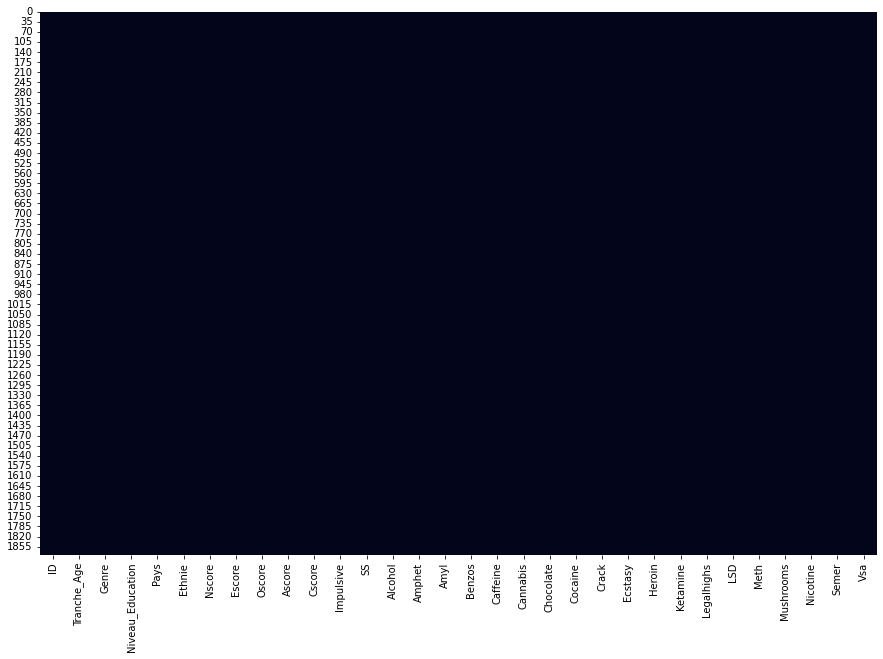

In [6]:
#On utilise une heatmap pour visualiser les valeurs manquantes dans le dataset.
#On voit qu'il n'y en a pas.
plt.figure(figsize=(15,10))
sns.heatmap(drug_consumption.isna(), cbar=False);

In [7]:
#On peut voir les types des différents variables.
drug_consumption.dtypes

ID                    int64
Tranche_Age         float64
Genre               float64
Niveau_Education    float64
Pays                float64
Ethnie              float64
Nscore              float64
Escore              float64
Oscore              float64
Ascore              float64
Cscore              float64
Impulsive           float64
SS                  float64
Alcohol              object
Amphet               object
Amyl                 object
Benzos               object
Caffeine             object
Cannabis             object
Chocolate            object
Cocaine              object
Crack                object
Ecstasy              object
Heroin               object
Ketamine             object
Legalhighs           object
LSD                  object
Meth                 object
Mushrooms            object
Nicotine             object
Semer                object
Vsa                  object
dtype: object

In [8]:
drug_consumption.dtypes.value_counts()

object     19
float64    12
int64       1
dtype: int64

In [9]:
#Une description statistique du dataset
drug_consumption.describe()

,ID,Tranche_Age,Genre,Niveau_Education,Pays,Ethnie,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [10]:
#Description de chaque variable : les différentes valeurs prises ainsi que leur répartition 
for col in drug_consumption.columns:
    if col == "ID":
        pass
    else:
        print(drug_consumption[col].value_counts(normalize=True),'\n\n')

-0.95197    0.341114
-0.07854    0.255172
 0.49788    0.188859
 1.09449    0.155968
 1.82213    0.049337
 2.59171    0.009549
Name: Tranche_Age, dtype: float64 


-0.48246    0.500265
 0.48246    0.499735
Name: Genre, dtype: float64 


-0.61113    0.268435
 0.45468    0.254642
 1.16365    0.150133
-0.05921    0.143236
-1.22751    0.053050
-1.73790    0.052520
 1.98437    0.047215
-1.43719    0.015915
-2.43591    0.014854
Name: Niveau_Education, dtype: float64 


 0.96082    0.553846
-0.57009    0.295491
-0.28519    0.062599
 0.24923    0.046154
-0.09765    0.028647
 0.21128    0.010610
-0.46841    0.002653
Name: Pays, dtype: float64 


-0.31685    0.912467
 0.11440    0.033422
-1.10702    0.017507
-0.50212    0.013793
 0.12600    0.010610
-0.22166    0.010610
 1.90725    0.001592
Name: Ethnie, dtype: float64 


-0.46725    0.046154
 0.41667    0.042440
-0.34799    0.041379
 0.62967    0.040849
-0.14882    0.040318
 0.04257    0.038727
-0.79151    0.037135
-0.05188    0.036605
-0.24649 

## Mise en forme du dataset pour la visualisation 

In [11]:
drug_consumption_EDA = drug_consumption.copy()

In [12]:
#Dans le but de mieux visualiser les données, nous avons décidé d'utiliser des dictionnaires pour transformer les variables
#exprimées 

dico_drugs = {"CL0": "Never Used",
               "CL1": "Used over a Decade Ago",
               "CL2": "Used in Last Decade",
               "CL3": "Used in Last Year",
               "CL4": "Used in Last Month",
               "CL5": "Used in Last Week",
               "CL6": "Used in Last Day"}

dico_tranche_age = {-0.95197:"18-24",
                    -0.07854:"25-34",
                    0.49788:"35-44",
                    1.09449:"45-54",
                    1.82213:"55-64",
                    2.59171:"65+"}

dico_nv_education = {-2.43591:"left school before 16",
                     -1.73790:"left school at 16",
                     -1.43719:"left school at 17",
                     -1.22751:"left school at 18",
                     -0.61113:"Some college or uni, no certif/degree",
                     -0.05921:"Professional certificate/ diploma",
                      0.45468:"Uni degree",
                      1.16365:"Masters degree",
                      1.98437:"Doctorate degree"}

dico_pays = {-0.09765:"Australia",
              0.24923:"Canada",
             -0.46841:"New Zealand",
             -0.28519:"Other",
              0.21128:"Republic of Ireland",
              0.96082:"UK",
             -0.57009:"USA"}

dico_ethnie = {-0.50212:"Asian",
               -1.10702:"Black",
                1.90725:"Mixed-Black/Asian",
                0.12600:"Mixed-White/Asian",
               -0.22166:"Mixed-White/Black",
                0.11440:"Other",
               -0.31685:"White"}


for col in drug_consumption_EDA.select_dtypes('object'):
    drug_consumption_EDA[col] = drug_consumption_EDA[col].map(dico_drugs)
    
drug_consumption_EDA["Genre"] = drug_consumption_EDA["Genre"].map(lambda x: "Male" if x < 0 else "Female")
drug_consumption_EDA["Tranche_Age"] = drug_consumption_EDA["Tranche_Age"].map(dico_tranche_age)
drug_consumption_EDA["Niveau_Education"] = drug_consumption_EDA["Niveau_Education"].map(dico_nv_education)
drug_consumption_EDA["Pays"] = drug_consumption_EDA["Pays"].map(dico_pays)
drug_consumption_EDA["Ethnie"] = drug_consumption_EDA["Ethnie"].map(dico_ethnie)
drug_consumption_EDA.drop("ID", inplace=True, axis = 1)

In [13]:
drug_consumption_EDA.head()

,Tranche_Age,Genre,Niveau_Education,Pays,Ethnie,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legalhighs,LSD,Meth,Mushrooms,Nicotine,Semer,Vsa
0,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,Used in Last Year,Never Used,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,Used in Last Decade,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


**Visualisation de la target pour toutes les drogues**

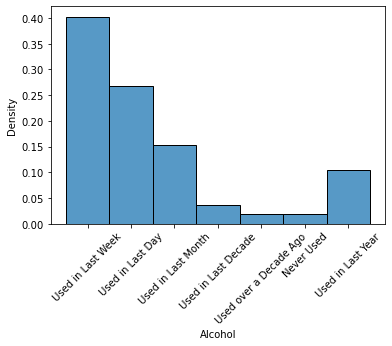

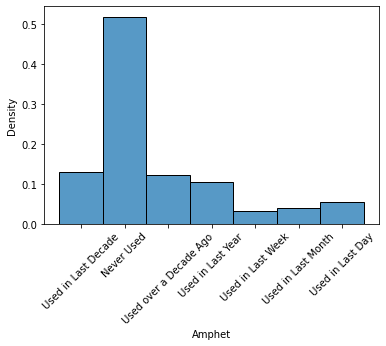

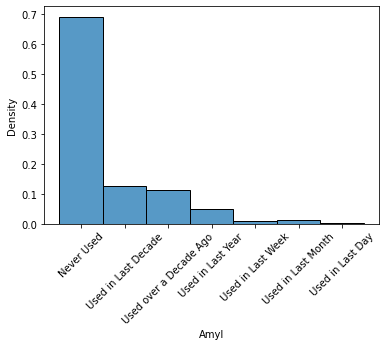

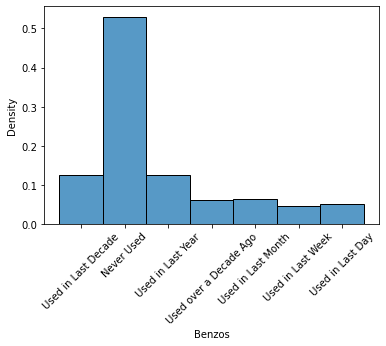

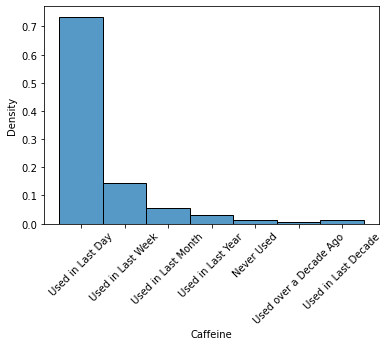

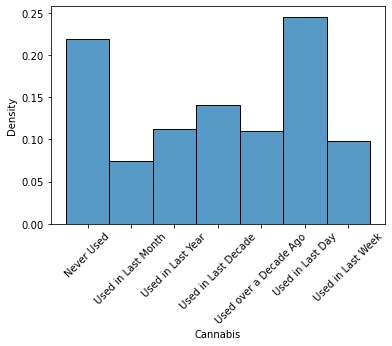

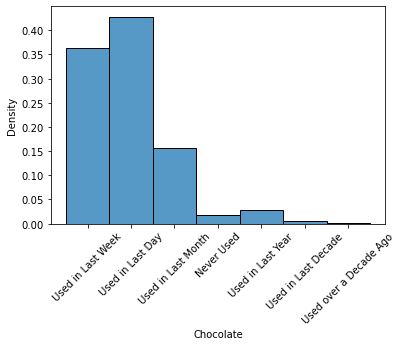

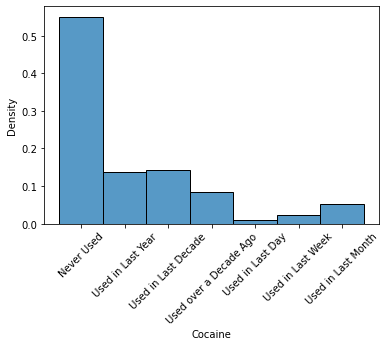

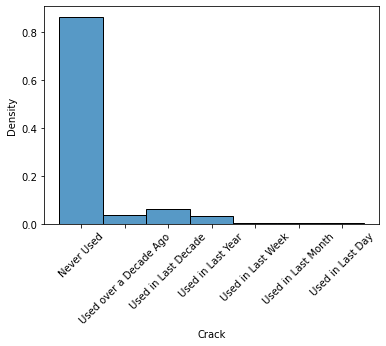

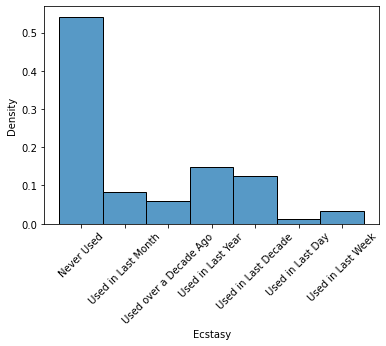

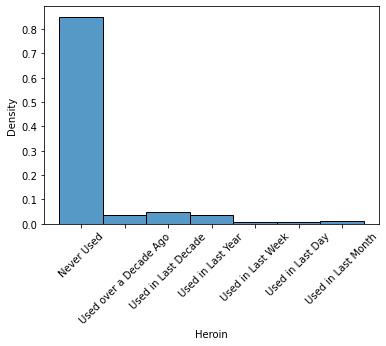

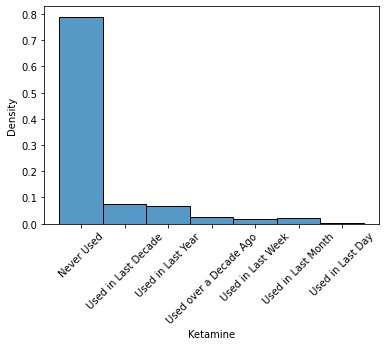

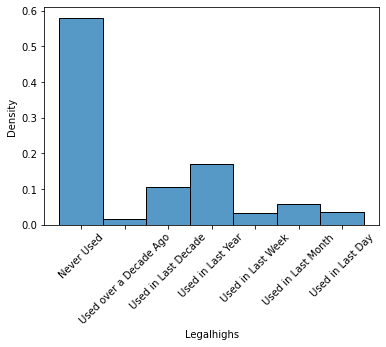

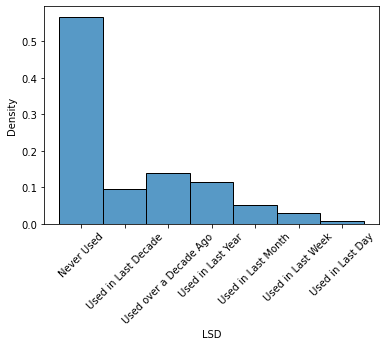

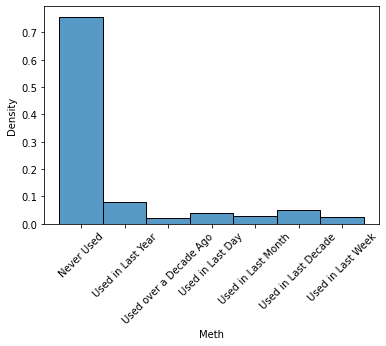

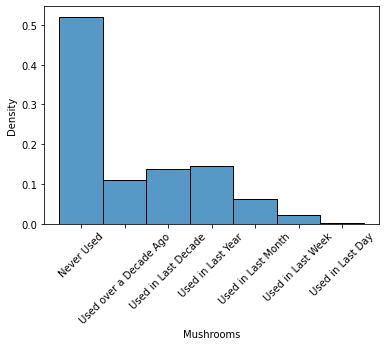

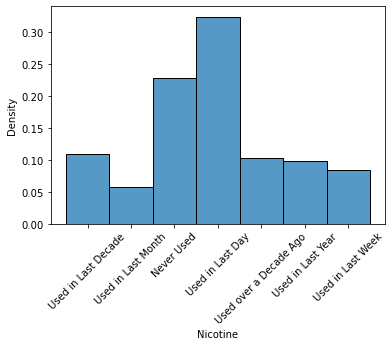

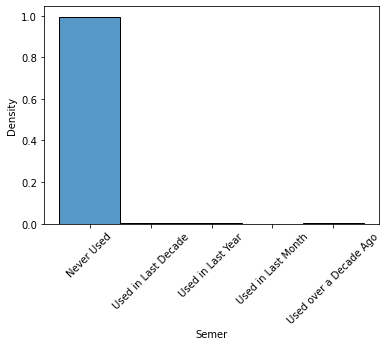

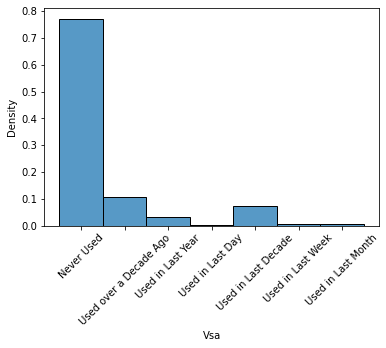

In [14]:
for col in drug_consumption_EDA.iloc[:,12:]:
    plt.figure()
    sns.histplot(drug_consumption_EDA[col], stat="density")
    plt.xticks(rotation=45)


Globalement, la répartition des classes est peu équilibrée, il s'agirait de changer la répartition des targets en regroupant les 7 catégories en 2 (binarisation).

Par exemple, une classification basée sur la consommation par decade, ou par mois.
Tout dépend de ce qu'on veut faire, ce qu'on veut étudier. Il est vrai qu'une étude qui détermine si on va être un consommateur régulier ou pas, se baserait sur une répartition par mois de la consommation ({never used/used over a decade ago/used in last decade/used in last year} {used in last month/used in last week/used in last day})

In [15]:
def binarization_decade(x, number_bool = False):
    if x == "CL0" or x == "CL1":
        return 0 if number_bool else "Non User"
    else:
        return 1 if number_bool else "User"

def binarization_month(x, number_bool = False):
    if x == "CL4" or x == "CL5" or x == "CL6":
        return 1 if number_bool else "User"
    else:
        return 0 if number_bool else "Non User"
    
def binarization_week(x, number_bool = False):
    if x == "CL5" or x == "CL6":
        return 1 if number_bool else "User"
    else:
        return 0 if number_bool else "Non User"

In [16]:
def preparation_visualisation(df, binarization = True):
    if binarization:
        for col in df.select_dtypes('object'):
            df[col] = df[col].map(lambda x: binarization_decade(x, True))
    
    df["Genre"] = df["Genre"].map(lambda x: "Male" if x < 0 else "Female")
    df["Tranche_Age"] = df["Tranche_Age"].map(dico_tranche_age)
    df["Niveau_Education"] = df["Niveau_Education"].map(dico_nv_education)
    df["Pays"] = df["Pays"].map(dico_pays)
    df["Ethnie"] = df["Ethnie"].map(dico_ethnie) 

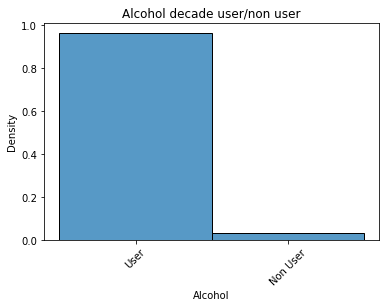

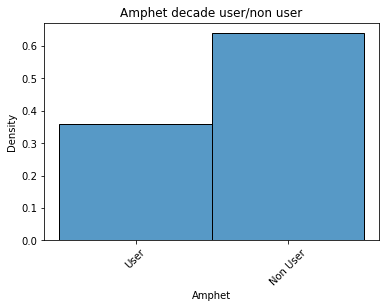

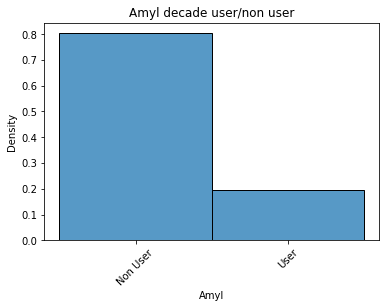

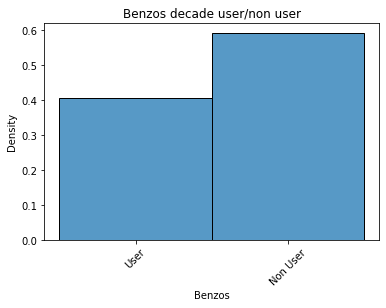

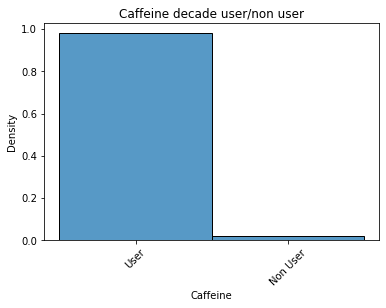

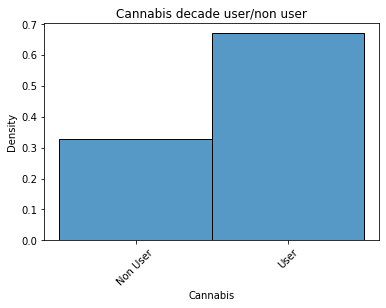

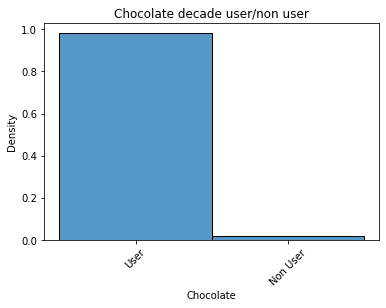

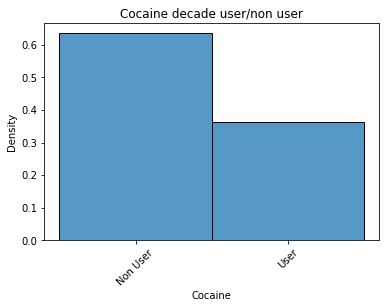

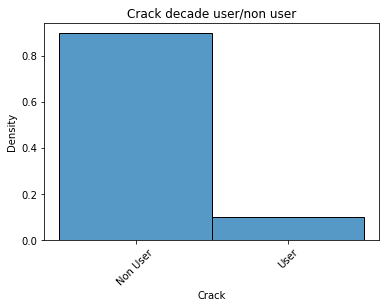

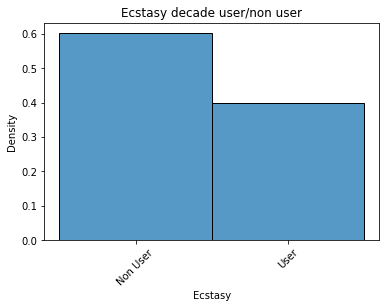

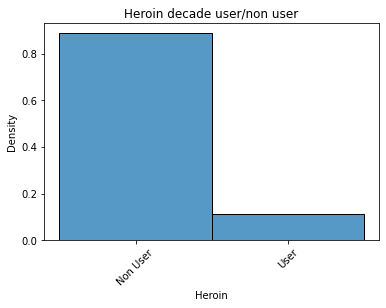

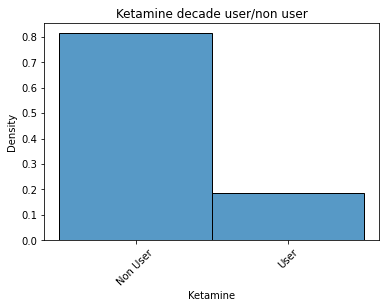

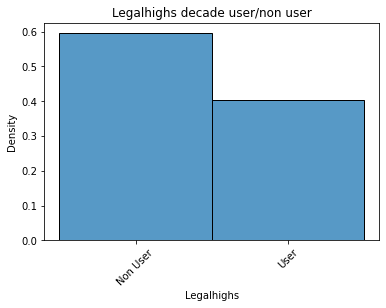

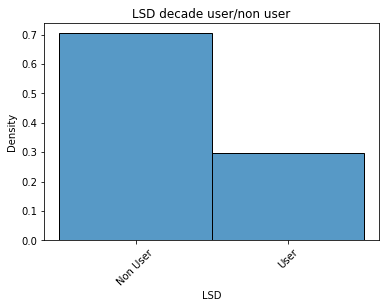

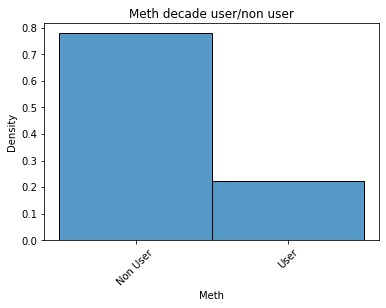

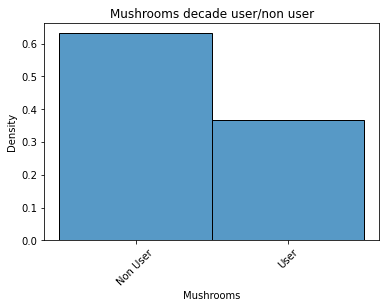

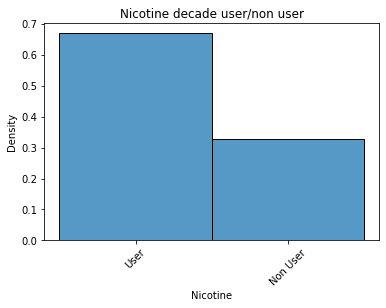

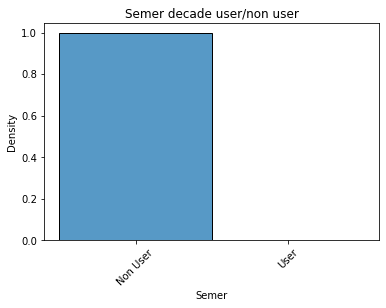

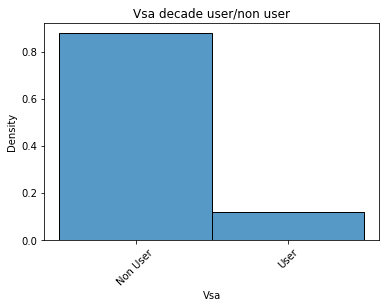

In [17]:
#visualisation des targets selon la binarisation décade
drug_consumption_EDA_bina_decade = drug_consumption.copy()

for col in drug_consumption_EDA_bina_decade.iloc[:,13:]:
    drug_consumption_EDA_bina_decade[col] = drug_consumption_EDA_bina_decade[col].map(binarization_decade)
    plt.figure()
    sns.histplot(drug_consumption_EDA_bina_decade[col], stat="density")
    plt.xticks(rotation=45)
    plt.title(col + " decade user/non user")

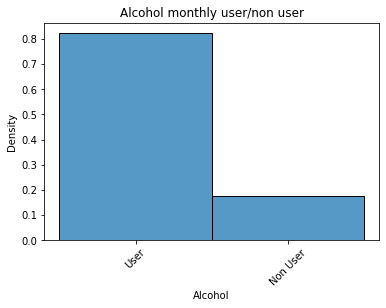

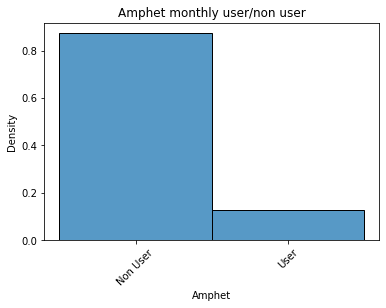

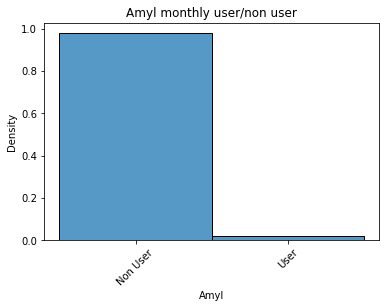

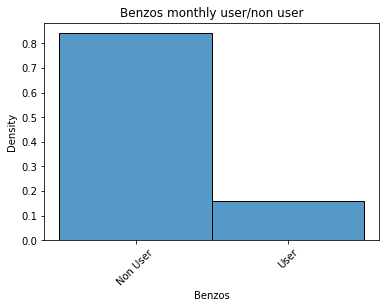

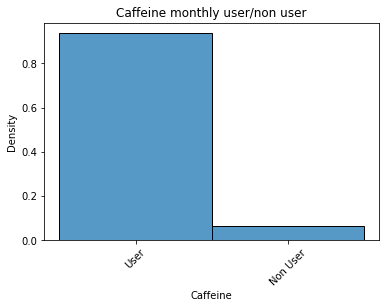

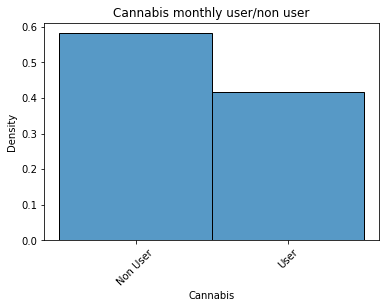

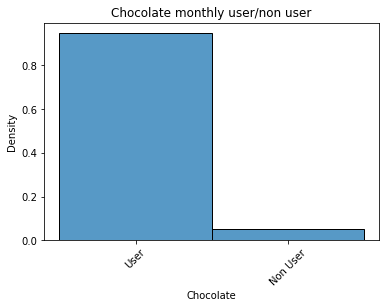

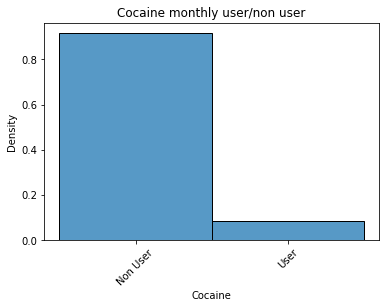

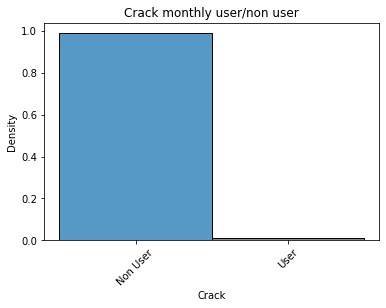

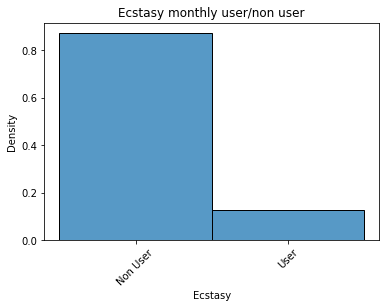

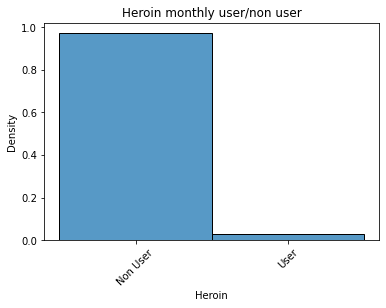

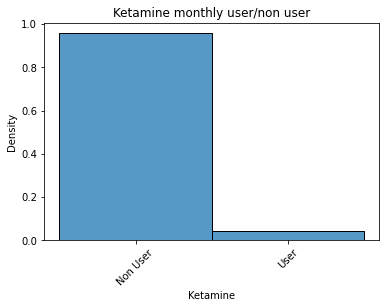

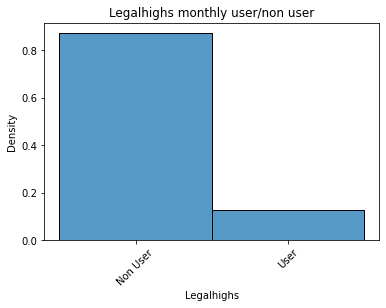

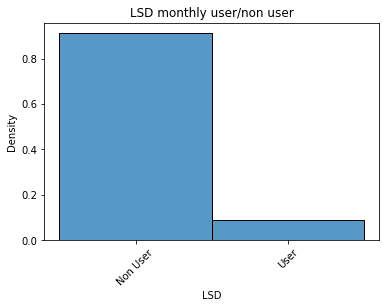

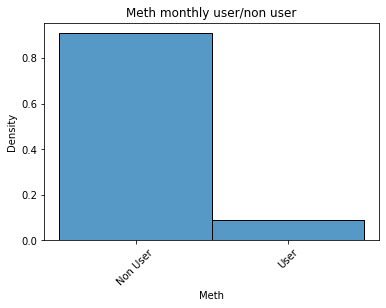

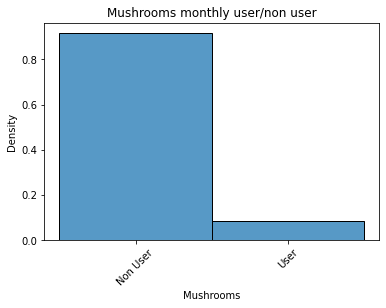

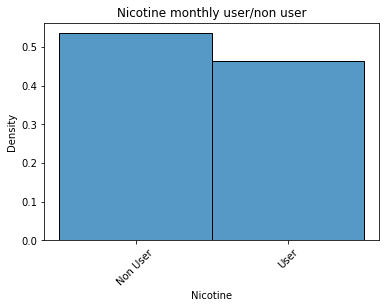

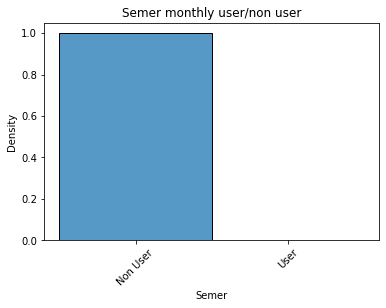

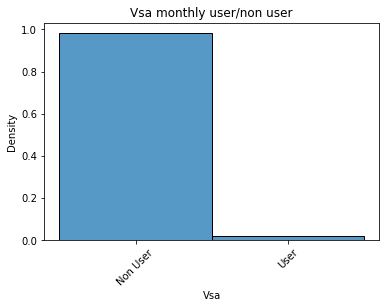

In [18]:
#visualisation des targets selon la binarisation mensuelle
drug_consumption_EDA_bina_month = drug_consumption.copy()

for col in drug_consumption_EDA_bina_month.iloc[:,13:]:
    drug_consumption_EDA_bina_month[col] = drug_consumption_EDA_bina_month[col].map(binarization_month)
    plt.figure()
    sns.histplot(drug_consumption_EDA_bina_month[col], stat="density")
    plt.xticks(rotation=45)
    plt.title(col + " monthly user/non user")

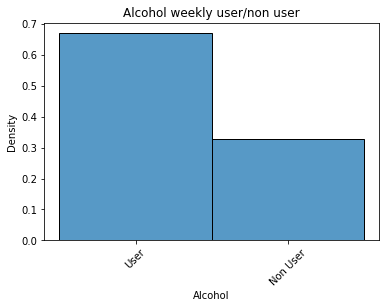

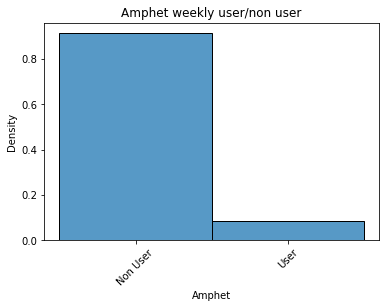

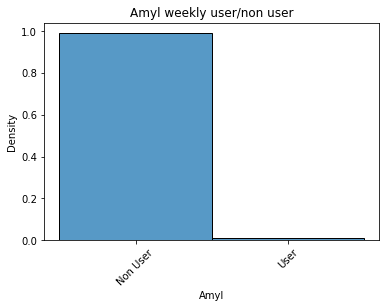

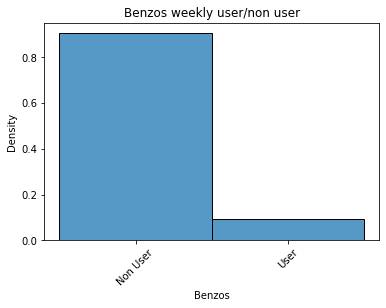

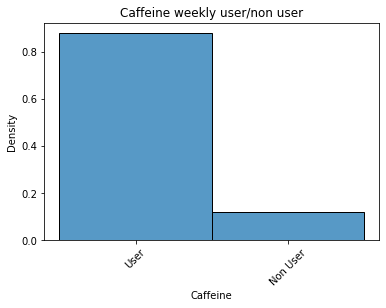

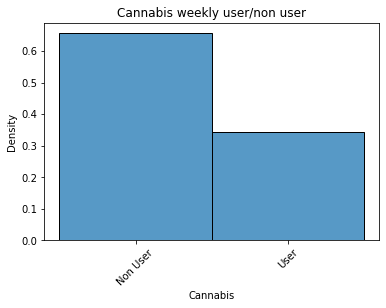

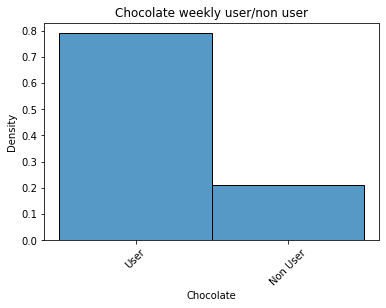

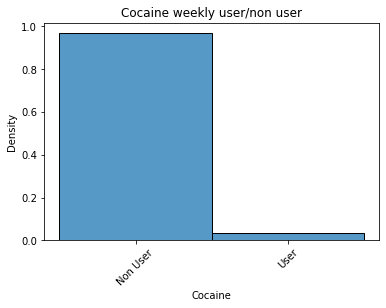

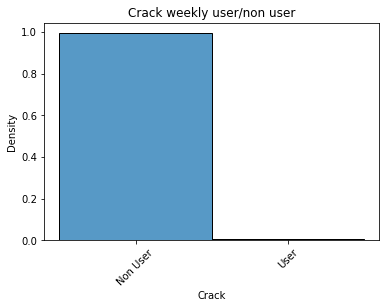

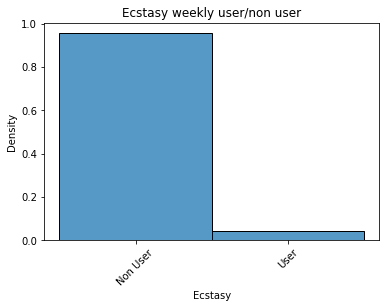

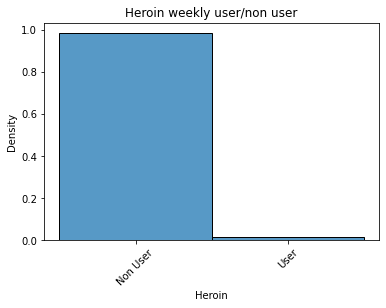

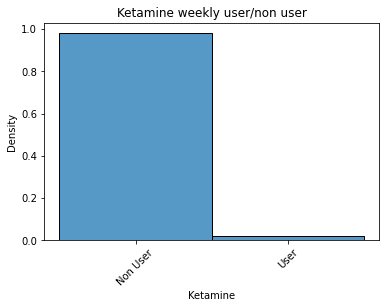

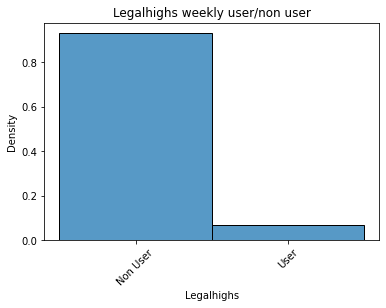

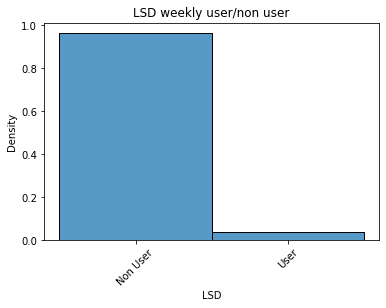

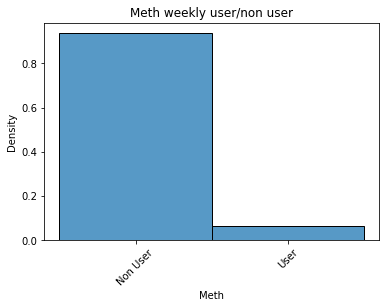

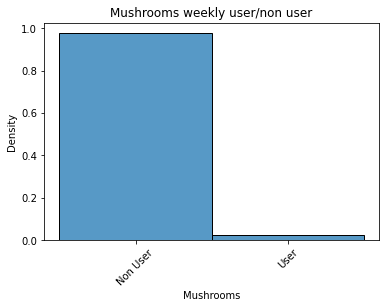

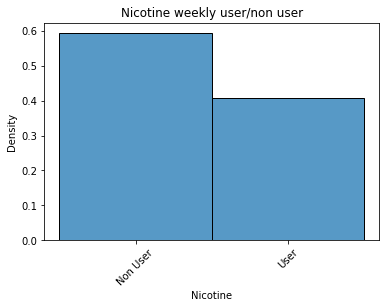

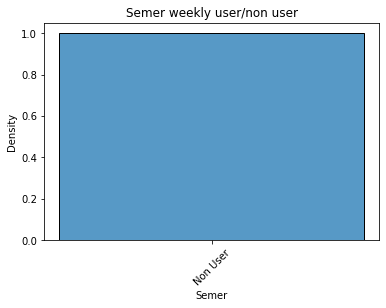

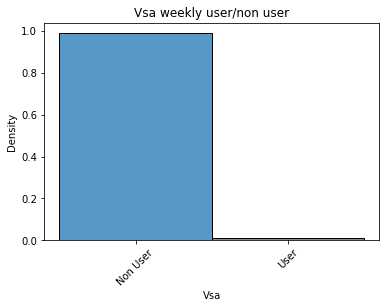

In [19]:
#visualisation des targets selon la binarisation hebdomadaire
drug_consumption_EDA_bina_week = drug_consumption.copy()

for col in drug_consumption_EDA_bina_week.iloc[:,13:]:
    drug_consumption_EDA_bina_week[col] = drug_consumption_EDA_bina_week[col].map(binarization_week)
    plt.figure()
    sns.histplot(drug_consumption_EDA_bina_week[col], stat="density")
    plt.xticks(rotation=45)
    plt.title(col + " weekly user/non user")

Il peut être pertinant d'essayer de voir s'il y a des liens entre la consommation de certaines drogues. Pour celà, on va se baser sur la binarisation "decade user/non user".

In [20]:
drug_consumption_EDA_bina_decade = drug_consumption.copy()

for col in drug_consumption_EDA_bina_decade.iloc[:,13:]:
    drug_consumption_EDA_bina_decade[col] = drug_consumption_EDA_bina_decade[col].map(lambda x: binarization_decade(x, number_bool=True))

In [21]:
drugs = drug_consumption_EDA_bina_decade.iloc[:,13:]

In [22]:
drugs

,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legalhighs,LSD,Meth,Mushrooms,Nicotine,Semer,Vsa
0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,1,0,1,1,1,1,0,1,0,1,0,1,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1
1881,1,0,0,0,1,1,1,0,0,1,0,0,1,1,1,1,1,0,0
1882,1,1,1,1,1,1,1,1,0,1,0,1,0,1,0,1,1,0,0
1883,1,0,0,0,1,1,1,0,0,1,0,0,1,1,0,1,1,0,0


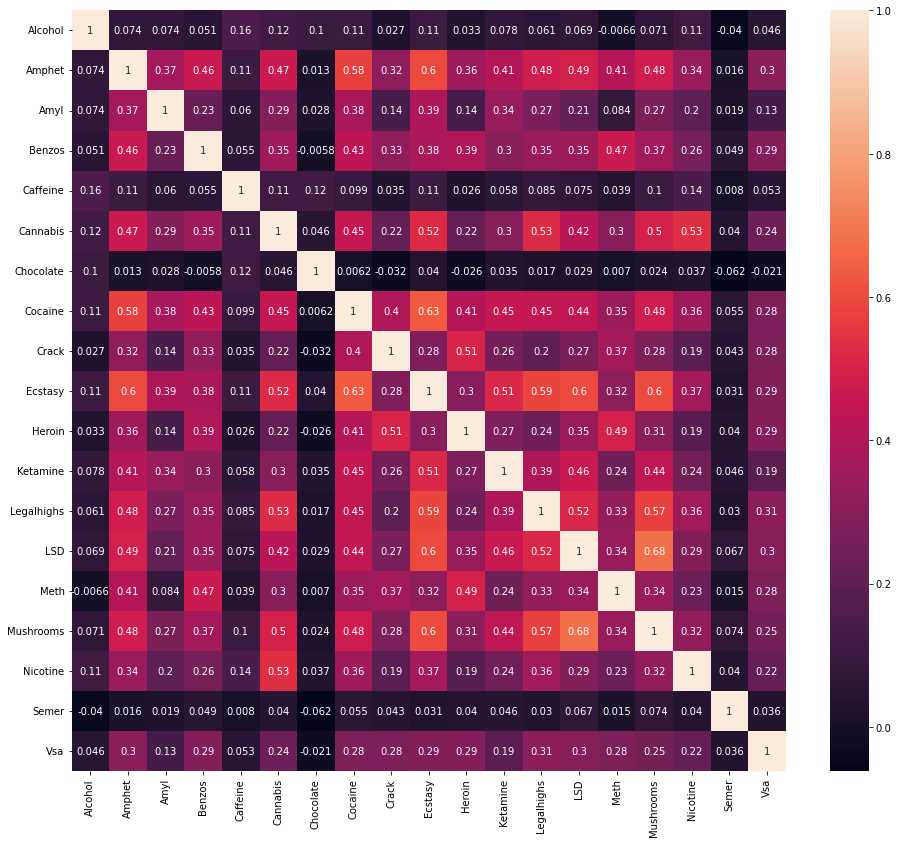

In [23]:
plt.figure(figsize=(16,14))
sns.heatmap(drugs.corr(), annot = True);

In [24]:
import scipy
import scipy.cluster.hierarchy as sch

X = drugs.corr().values
d = sch.distance.pdist(X)
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [drugs.columns.tolist()[i] for i in list((np.argsort(ind)))]
drugs = drugs.reindex(columns, axis=1)

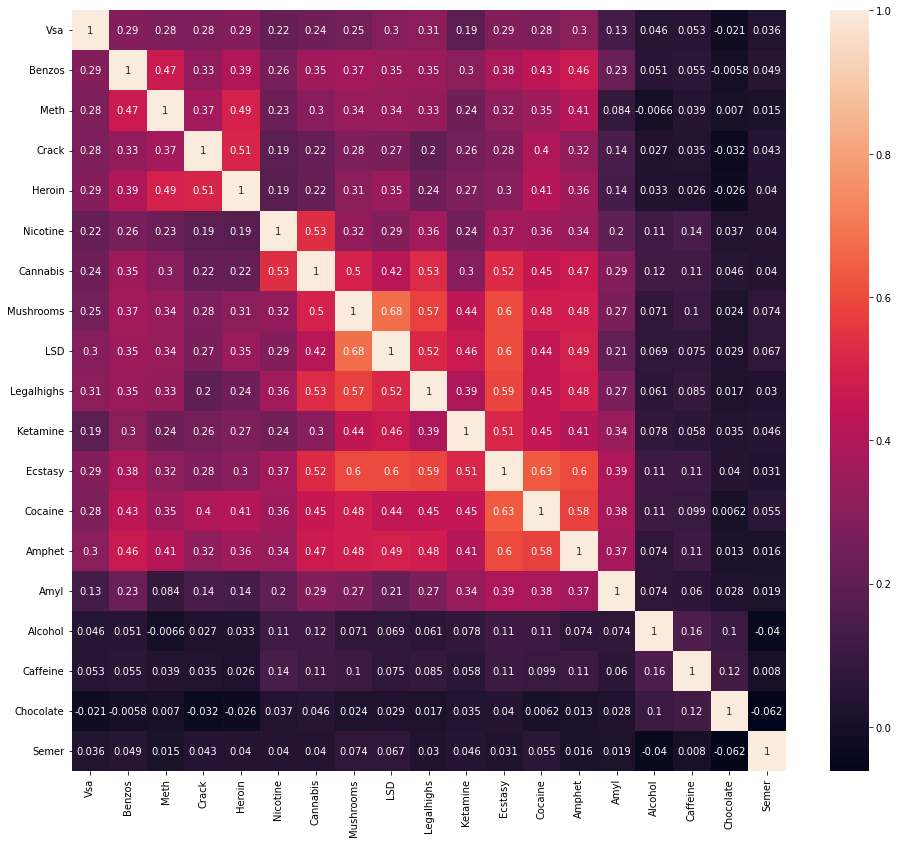

In [25]:
plt.figure(figsize=(16,14))
ax = sns.heatmap(drugs.corr(), annot = True)

2 clusters : de benzo à heroin et de nicotine à amyl. Cela ne correspond pas au cluster que j'ai pu découvrir en lisant des articles et travaux sur ce dataset. Je pense que cela est du à la technique que j'emploie. J'ai choisi de créer des clusters à partir de la matrice de correlation. On peut se poser la question de la pertinance de cette méthode. Néanmoins, j'ai toruvé mon initiatives intéressantes, mais je vais utiliser les pleiades/clusters que j'ai pu trouver dans mes recherches documentaires.

Il aurait été intéressant d'essayer de reclusteriser le cluster qui va de nicotine à amyl car il reste assez large.

**Distributions des features**

In [26]:
#les pleiades que nous allons utiliser dans la suite de l'étude.

#Plus pratique pour la visualisation 

heroinPl = ["Crack", "Heroin", "Cocaine", "Meth"]
ecstasyPl = ["Amphet", "Cannabis", "Cocaine", "Ketamine", "LSD", "Mushrooms", "Legalhighs", "Ecstasy"]
benzoPl = ["Benzos", "Meth", "Cocaine", "Amphet"]

features = ["Tranche_Age", "Genre", "Niveau_Education", "Pays", "Ethnie", "Nscore", "Escore", "Oscore", "Ascore", 
            "Cscore", "Impulsive", "SS"]

In [27]:
#Préparation des datasets utilisés pour la visualisation

data_heroinPl = drug_consumption.copy()[features + heroinPl]
data_ecstasyPl = drug_consumption.copy()[features + ecstasyPl]
data_benzoPl = drug_consumption.copy()[features + benzoPl]

preparation_visualisation(data_heroinPl)
preparation_visualisation(data_ecstasyPl)
preparation_visualisation(data_benzoPl)

In [28]:
data_benzoPl["BenzoPl"] = data_benzoPl.iloc[:,12:].sum(axis=1).map(lambda x: 1 if x > 0 else 0)
data_benzoPl.drop(benzoPl, inplace=True, axis=1)

In [29]:
data_ecstasyPl["EcstasyPl"] = data_ecstasyPl.iloc[:,12:].sum(axis=1).map(lambda x: 1 if x > 0 else 0)
data_ecstasyPl.drop(ecstasyPl, inplace=True, axis=1)

In [30]:
data_heroinPl["HeroinPl"] = data_heroinPl.iloc[:,12:].sum(axis=1).map(lambda x: 1 if x > 0 else 0)
data_heroinPl.drop(heroinPl, inplace=True, axis=1)

In [31]:
data_drugs = [data_heroinPl, data_ecstasyPl, data_benzoPl]

In [32]:
for df in data_drugs:
    print(df.iloc[:,-1].value_counts(normalize=True),'\n')

0    0.558621
1    0.441379
Name: HeroinPl, dtype: float64 

1    0.698674
0    0.301326
Name: EcstasyPl, dtype: float64 

1    0.577719
0    0.422281
Name: BenzoPl, dtype: float64 



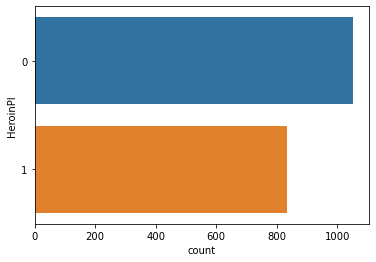

In [33]:
sns.countplot(y = "HeroinPl" ,data= data_heroinPl);
#plt.title()

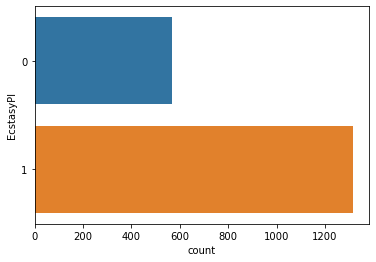

In [34]:
sns.countplot(y = "EcstasyPl", data= data_ecstasyPl);

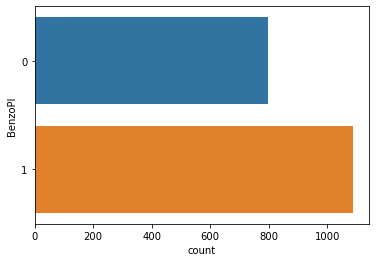

In [35]:
sns.countplot(y = "BenzoPl", data= data_benzoPl);

On peut voir que la répartition de classe dans les pleiades est plutot équilibrée pour l'Heroine et le Benzo, mais pas pour l'ecstasy (70/30). On va utiliser ses pleiades pour visualiser les relations target/feature, car c'est bien plus pratiques

**Visualisation de la distribution des features**

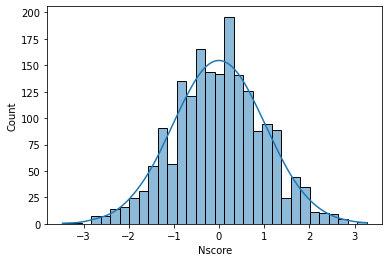

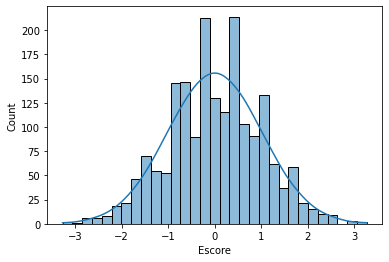

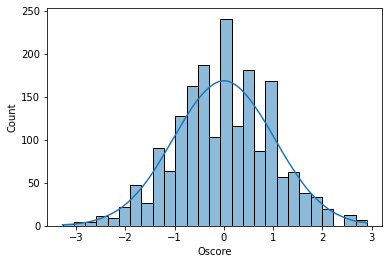

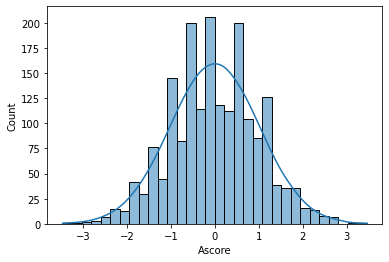

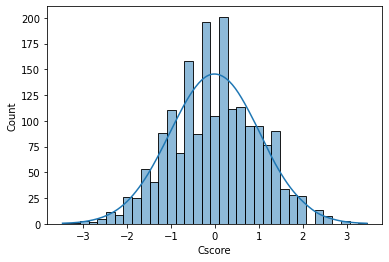

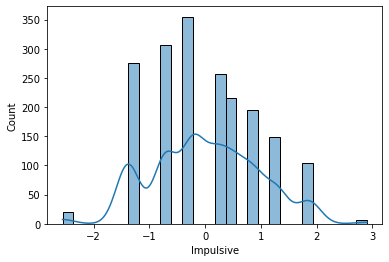

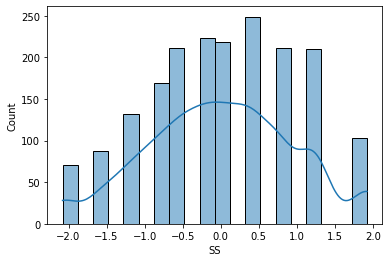

In [36]:
for col in data_ecstasyPl.select_dtypes('float'):
    plt.figure()
    sns.histplot(data_ecstasyPl[col], kde=True)
    

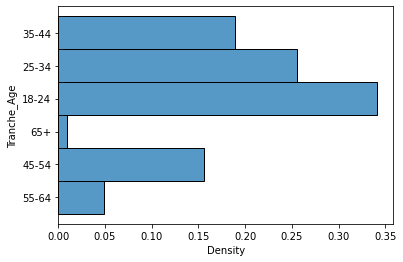

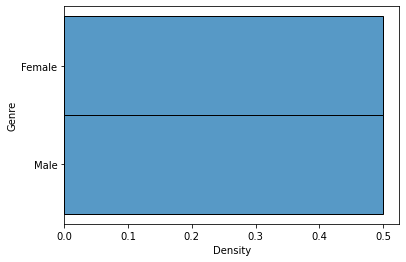

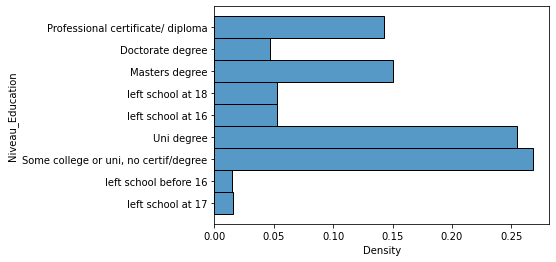

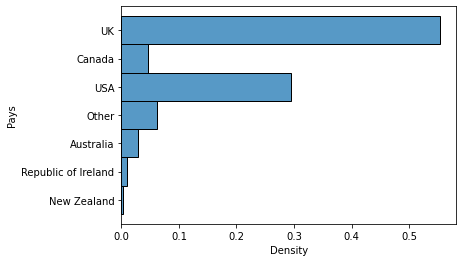

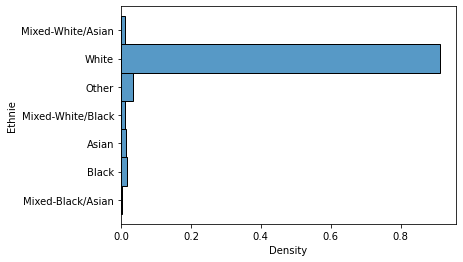

In [37]:
for col in data_ecstasyPl.select_dtypes('object'):
    plt.figure()
    sns.histplot(y = data_ecstasyPl[col], stat = 'density')

En observant la répartition des classes, on peut voir que les variables ethnie et pays, on l'air d'avoir des variances très faibles. Ethnie est composée à plus de 85% de blanc, et la variable pays est composée à plus de 80% d'anglais et d'américain. Il parait compliqué de dire que ces catégories peuvent être représentatives dans un modèles prédictifs, avec uniquement 1885 valeurs et une répartition aussi peu équilibrée. On pense ne pas utiliser ces 2 variables, avec les données fournies par le dataset.

**Visualisations dépendances variables/target**

In [38]:
drug_consumer_ecstasy = data_ecstasyPl[data_ecstasyPl["EcstasyPl"] == 1]
drug_non_consumer_ecstasy = data_ecstasyPl[data_ecstasyPl["EcstasyPl"] == 0]

drug_consumer_benzo = data_benzoPl[data_benzoPl["BenzoPl"] == 1]
drug_non_consumer_benzo = data_benzoPl[data_benzoPl["BenzoPl"] == 0]

drug_consumer_heroin = data_heroinPl[data_heroinPl["HeroinPl"] == 1]
drug_non_consumer_heroin = data_heroinPl[data_heroinPl["HeroinPl"] == 0]

<Figure size 432x288 with 0 Axes>

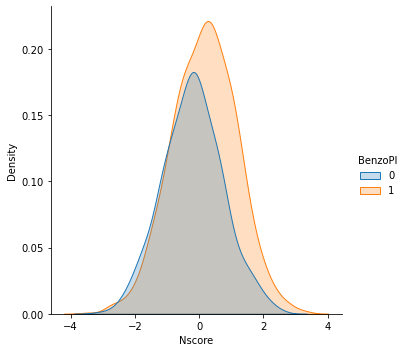

<Figure size 432x288 with 0 Axes>

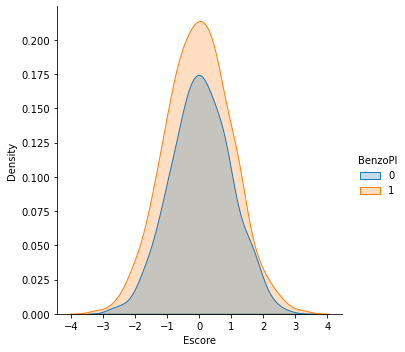

<Figure size 432x288 with 0 Axes>

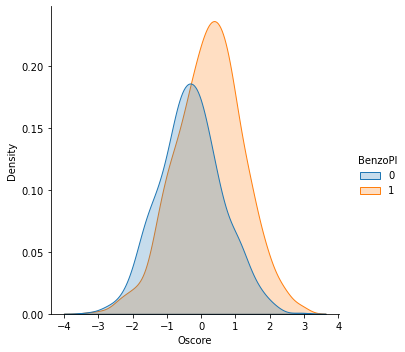

<Figure size 432x288 with 0 Axes>

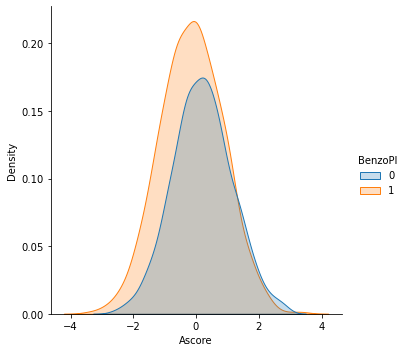

<Figure size 432x288 with 0 Axes>

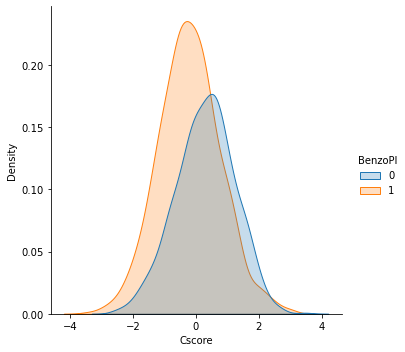

<Figure size 432x288 with 0 Axes>

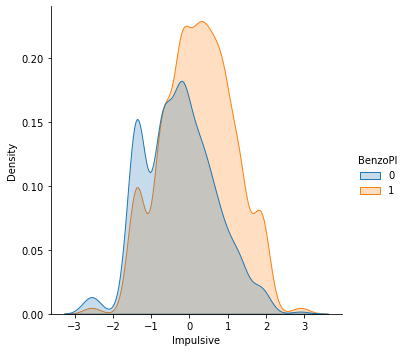

<Figure size 432x288 with 0 Axes>

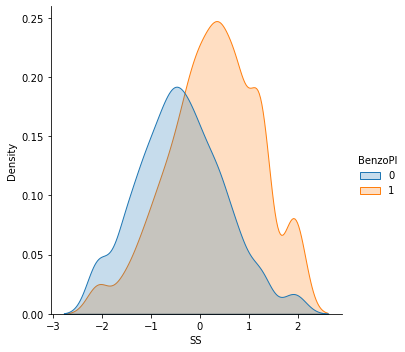

In [39]:
for col in data_benzoPl.select_dtypes('float'):
    plt.figure()
    sns.displot(data=data_benzoPl, x=col, hue="BenzoPl", kind='kde', fill = True);

<Figure size 432x288 with 0 Axes>

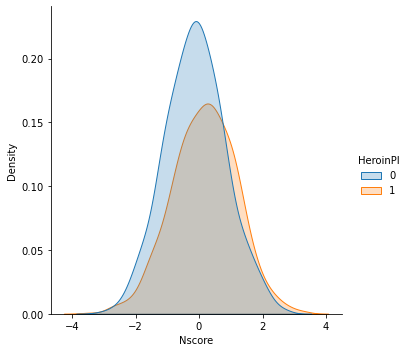

<Figure size 432x288 with 0 Axes>

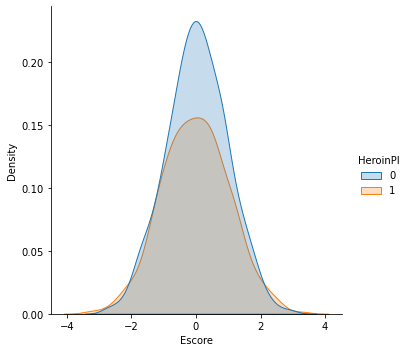

<Figure size 432x288 with 0 Axes>

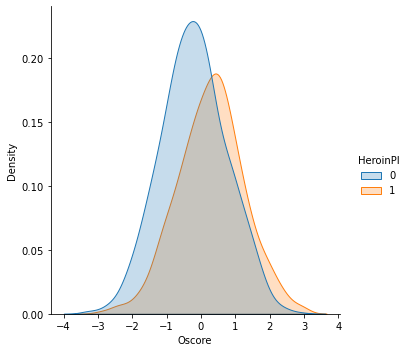

<Figure size 432x288 with 0 Axes>

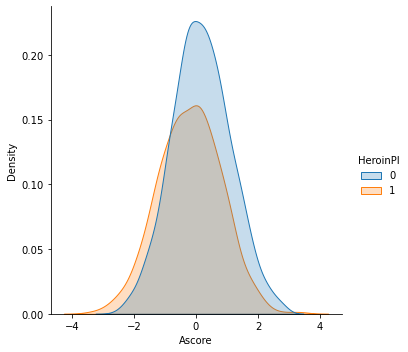

<Figure size 432x288 with 0 Axes>

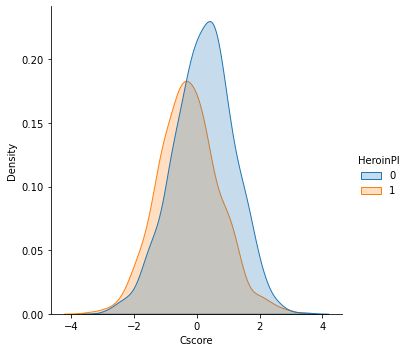

<Figure size 432x288 with 0 Axes>

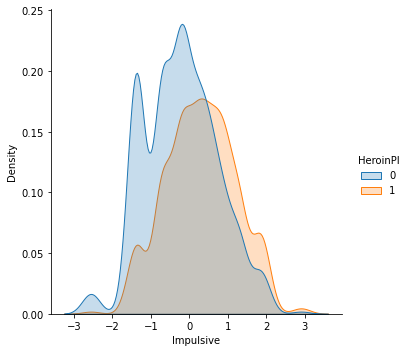

<Figure size 432x288 with 0 Axes>

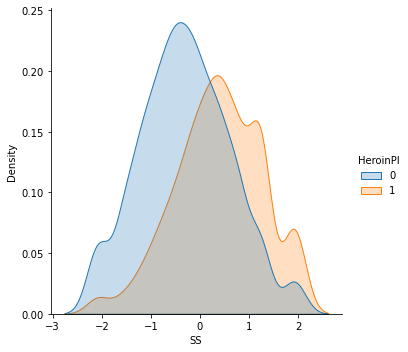

In [40]:
for col in data_heroinPl.select_dtypes('float'):
    plt.figure()
    sns.displot(data=data_heroinPl, x=col, hue="HeroinPl", kind='kde', fill = True);

<Figure size 432x288 with 0 Axes>

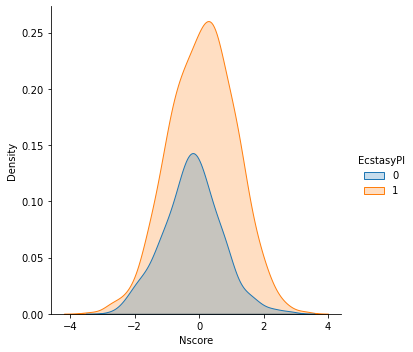

<Figure size 432x288 with 0 Axes>

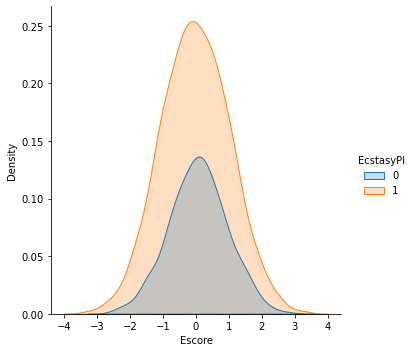

<Figure size 432x288 with 0 Axes>

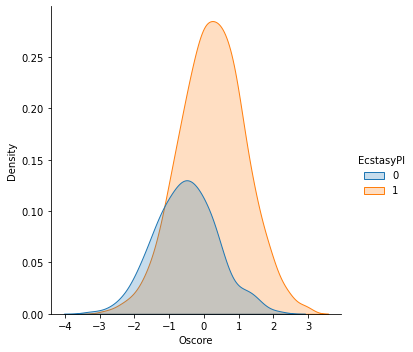

<Figure size 432x288 with 0 Axes>

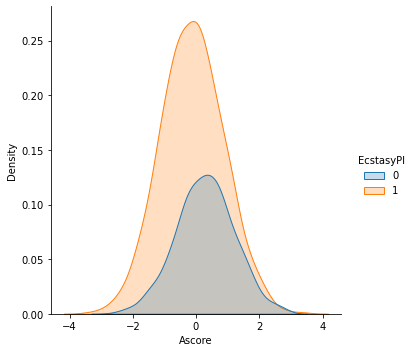

<Figure size 432x288 with 0 Axes>

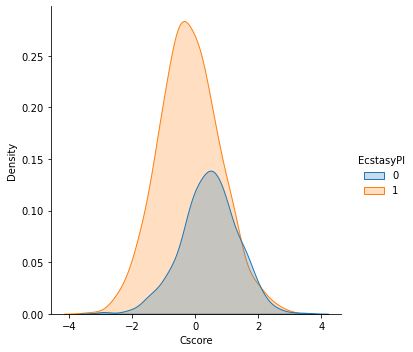

<Figure size 432x288 with 0 Axes>

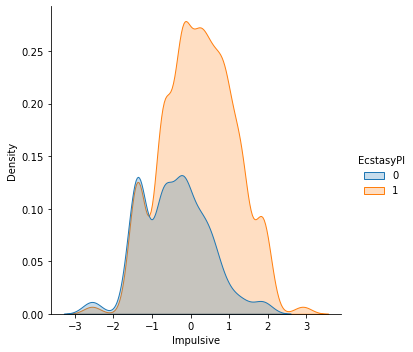

<Figure size 432x288 with 0 Axes>

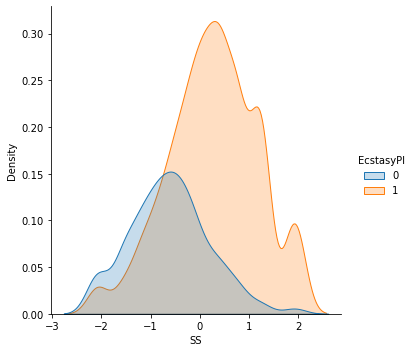

In [41]:
for col in data_ecstasyPl.select_dtypes('float'):
    plt.figure()
    sns.displot(data=data_ecstasyPl, x=col, hue="EcstasyPl", kind='kde', fill = True);

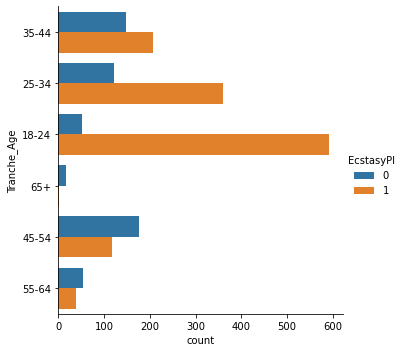

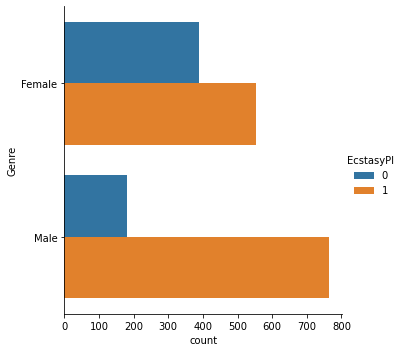

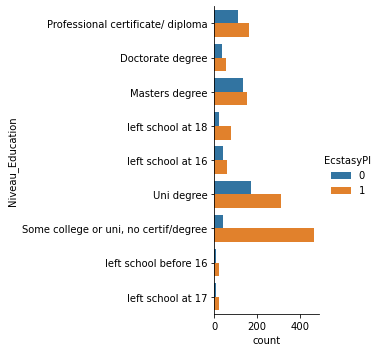

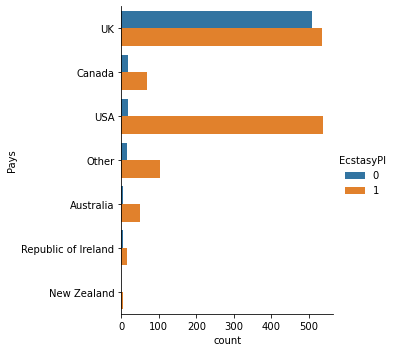

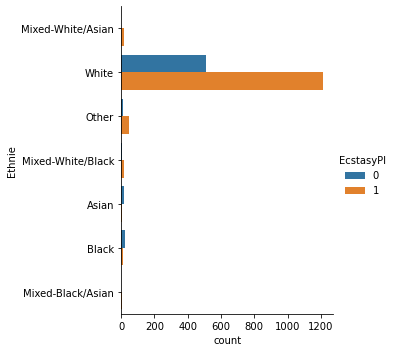

In [42]:
for col in data_ecstasyPl.iloc[:,:5]:
    sns.catplot(y=col, hue="EcstasyPl", kind="count", data=data_ecstasyPl);

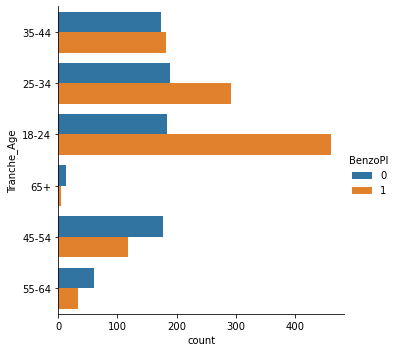

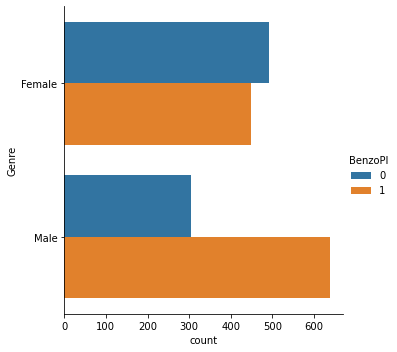

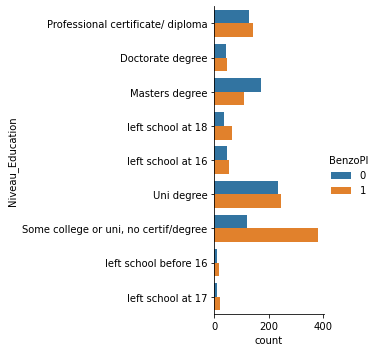

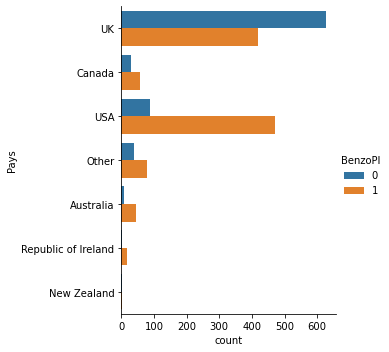

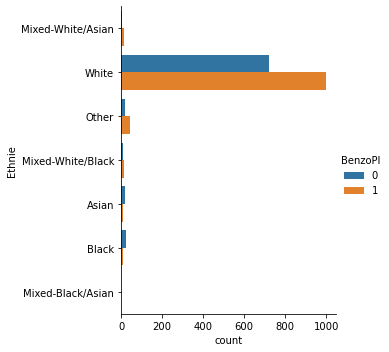

In [43]:
for col in data_benzoPl.iloc[:,:5]:
    sns.catplot(y=col, hue="BenzoPl", kind="count", data=data_benzoPl);

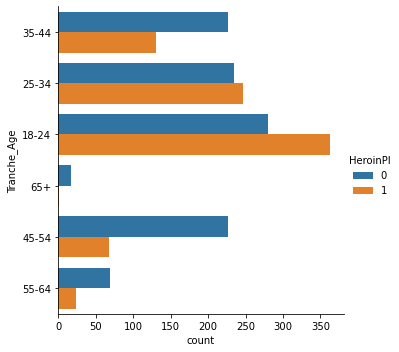

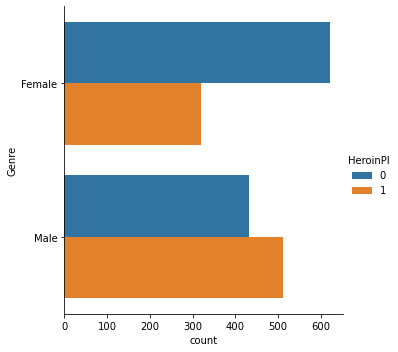

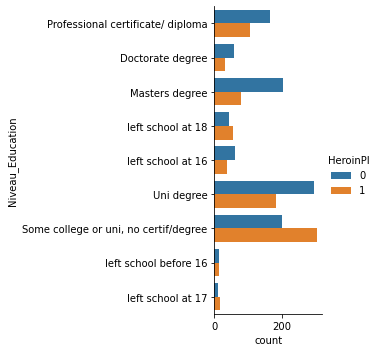

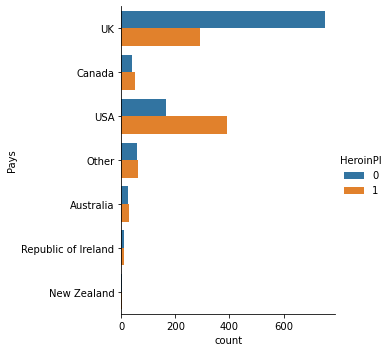

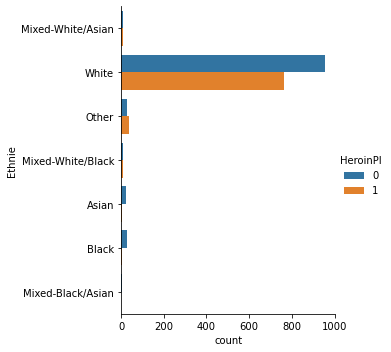

In [44]:
for col in data_heroinPl.iloc[:,:5]:
    sns.catplot(y=col, hue="HeroinPl", kind="count", data=data_heroinPl);

**Relation features/features**

In [45]:
data_features = drug_consumption[features]

In [46]:
data_features

,Tranche_Age,Genre,Niveau_Education,Pays,Ethnie,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173
1881,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540
1882,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593
1883,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470


In [47]:
corr_features = data_features.corr()

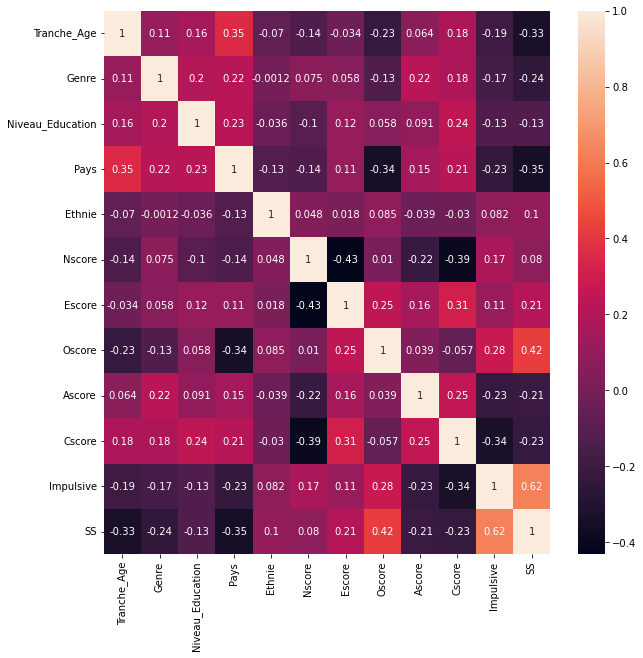

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_features, annot=True);

On peut voir que globalement les variables ne sont pas hautement corrélées. La PCA ne parait pas nécessaire, mais sera peut être tentée.

Ethnie est très faiblement corrélée avec les autres variables. Pays est tout de même assez corrélée, notamment avec le Escore, le Cscore. Néanmoins, dans la suite de l'étude, je n'utiliserai pas ethnie et pays, par manque de valeur et de diversité dans les valeurs.

# PreProcessing and Modelling 

On supprime les colonnes Ethnies et Pays très clairement. On va considerer les colonnes Age, Niveau d'etude, genre, comme des catégories. On va les "dummieser" (transformer en plusieurs variables binaires : chaque variable binaire représente une catégorie de la variable originale).

In [49]:
drug_consumption

,ID,Tranche_Age,Genre,Niveau_Education,Pays,Ethnie,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caffeine,Cannabis,Chocolate,Cocaine,Crack,Ecstasy,Heroin,Ketamine,Legalhighs,LSD,Meth,Mushrooms,Nicotine,Semer,Vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,CL5,CL0,CL0,CL0,CL6,CL6,CL5,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [50]:
#Ma fonction de preprocessing pour mettre en forme mes datasets et les retourner sous forme Variables/Targets

def datapreprocessing(df):
    df.drop(["ID"], axis = 1, inplace = True)
    X = df.copy()[features]
    y = df.copy().drop(features, axis = 1)
    
    X.drop(["Pays"], axis = 1, inplace = True)
    X.drop(["Ethnie"], axis = 1, inplace = True)
    y.drop(["Semer"], axis = 1, inplace = True)
    for col in y.columns:
        y[col] = y[col].map(lambda x: binarization_decade(x, True))
    
    X["Genre"] = X["Genre"].map(lambda x: "Male" if x < 0 else "Female")
    X["Tranche_Age"] = X["Tranche_Age"].map(dico_tranche_age)
    X["Niveau_Education"] = X["Niveau_Education"].map(dico_nv_education)
    X = pd.get_dummies(columns=["Tranche_Age", "Genre", "Niveau_Education"], data = X)
    
    return X,y
    
    

In [51]:
#Ma fonction pour split mes données, j'ai adapté la fonction train_test_split de sklearn à mon utilisation
from sklearn.model_selection import train_test_split

def train_test_split_drugs(X,y_drugs):
    y_split_drugs = []
    for col in y_drugs.columns:
        y_split_drugs.append(y_drugs[[col]])
    X_train_X_test_y_train_y_test_tab = []
    for i in range(len(y_split_drugs)):
        X_train,X_test,y_train,y_test = train_test_split(X,y_split_drugs[i], test_size=0.2, random_state=0, 
                                                         stratify=y_split_drugs[i])
        X_train_X_test_y_train_y_test_tab.append((X_train,X_test,y_train,y_test))
        
    return X_train_X_test_y_train_y_test_tab


In [52]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import fbeta_score, confusion_matrix
#Evaluation des modèles via le f1 score, plus pertinent dans le cadre de dataset non équilibré

def modelEvaluation(model, X_train,X_test,y_train,y_test):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    f1score = f1_score(y_test, y_pred)
    #precision =  precision_score(y_test, y_pred)
    #recall = recall_score(y_test, y_pred)
    #auc_score = roc_auc_score(y_test, y_pred)
    #fbetascore = fbeta_score(y_test, y_pred, beta=2)
    return f1score
    
        
        
        
    
    
    

In [53]:
#LDA KNN Logistic Regression DT RF Naives Bayes SVM
#Fonction qui va me permettre de tester plusieurs modèles pour chaque drogue et de retourner le plus performant selon le
#scoring que j'ai choisi, c'est à dire le f1 score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


def BestModelForEachDrugs(X_train,X_test,y_train,y_test):
    rf = RandomForestClassifier(random_state=0)
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier(random_state=0)
    naive_bayes = GaussianNB()
    lda = LinearDiscriminantAnalysis()
    lr = LogisticRegression(random_state=0)
    svm = SVC(random_state=0)
    
    rf_f1_score = modelEvaluation(rf, X_train,X_test,y_train,y_test)
    dt_f1_score = modelEvaluation(dt, X_train,X_test,y_train,y_test)
    
    #scaling for the other models 
    scaler = StandardScaler()
    scaler.fit(X_train.iloc[:,:7])
    X_train.iloc[:,:7] = scaler.transform(X_train.iloc[:,:7])
    X_test.iloc[:,:7] = scaler.transform(X_test.iloc[:,:7])
    
    knn_f1_score = modelEvaluation(knn, X_train,X_test,y_train,y_test)
    naive_bayes_f1_score = modelEvaluation(naive_bayes, X_train,X_test,y_train,y_test)
    lda_f1_score = modelEvaluation(lda, X_train,X_test,y_train,y_test)
    lr_f1_score = modelEvaluation(lr, X_train,X_test,y_train,y_test)
    svm_f1_score = modelEvaluation(svm, X_train,X_test,y_train,y_test)
    
    list_model = [(dt, dt_f1_score), 
                  (knn, knn_f1_score), 
                  (naive_bayes, naive_bayes_f1_score), 
                  (lda, lda_f1_score), 
                  (lr, lr_f1_score),
                  (svm, svm_f1_score),
                  (rf, rf_f1_score)]
    
    
    list_model = sorted(list_model, key=lambda model: model[1], reverse= True)
    
    return list_model[0]
    
    
    

In [54]:
X, y = datapreprocessing(drug_consumption.copy())
TrainTest_EachDrugs_Split = train_test_split_drugs(X,y)
ListBestModelForEachDrug = []

for X_train,X_test,y_train,y_test in TrainTest_EachDrugs_Split:
    best_model_drug = BestModelForEachDrugs(X_train,X_test,np.ravel(y_train),np.ravel(y_test))
    ListBestModelForEachDrug.append((best_model_drug, y_test.columns))

In [55]:
for model, drug in ListBestModelForEachDrug:
    print(model, drug[0], '\n')

(KNeighborsClassifier(), 0.981081081081081) Alcohol 

(SVC(random_state=0), 0.5823754789272031) Amphet 

(GaussianNB(), 0.3444976076555024) Amyl 

(LogisticRegression(random_state=0), 0.5644599303135889) Benzos 

(KNeighborsClassifier(), 0.9906291834002677) Caffeine 

(LogisticRegression(random_state=0), 0.8446969696969698) Cannabis 

(KNeighborsClassifier(), 0.9906291834002677) Chocolate 

(GaussianNB(), 0.5684210526315789) Cocaine 

(GaussianNB(), 0.2333333333333333) Crack 

(SVC(random_state=0), 0.7100977198697069) Ecstasy 

(GaussianNB(), 0.25) Heroin 

(GaussianNB(), 0.36065573770491804) Ketamine 

(KNeighborsClassifier(), 0.7547169811320756) Legalhighs 

(LinearDiscriminantAnalysis(), 0.6181818181818182) LSD 

(GaussianNB(), 0.4977777777777777) Meth 

(SVC(random_state=0), 0.6545454545454545) Mushrooms 

(SVC(random_state=0), 0.8130671506352087) Nicotine 

(GaussianNB(), 0.32558139534883723) Vsa 



Ainsi, on obtient les meilleurs modèles, selon le f1 score, pour chaque drogue. Ces modèles n'ont pas été optimisé, on peut donc probablement améliorer certains des scores. 

Maintenant nous allons faire la même chose mais pour les pleiades 

In [56]:
X_heroinPl, y_heroinPl = datapreprocessing(drug_consumption.copy())
y_heroinPl = y_heroinPl[heroinPl]

y_heroinPl["HeroinPl"] = y_heroinPl.sum(axis=1).map(lambda x: 1 if x > 0 else 0)
y_heroinPl.drop(heroinPl, inplace=True, axis=1)

In [57]:
X_benzoPl, y_benzoPl = datapreprocessing(drug_consumption.copy())
y_benzoPl = y_benzoPl[benzoPl]

y_benzoPl["BenzoPl"] = y_benzoPl.sum(axis=1).map(lambda x: 1 if x > 0 else 0)
y_benzoPl.drop(benzoPl, inplace=True, axis=1)

In [58]:
X_ecstasyPl, y_ecstasyPl = datapreprocessing(drug_consumption.copy())
y_ecstasyPl = y_ecstasyPl[ecstasyPl]

y_ecstasyPl["EcstasyPl"] = y_ecstasyPl.sum(axis=1).map(lambda x: 1 if x > 0 else 0)
y_ecstasyPl.drop(ecstasyPl, inplace=True, axis=1)

**Recherche du meilleur modèle pour le groupe heroinPL**

In [59]:
y_heroinPl.value_counts(normalize=True)

HeroinPl
0           0.558621
1           0.441379
dtype: float64

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_heroinPl, y_heroinPl, test_size=0.2, random_state=0)

In [61]:
BestModelForEachDrugs(X_train, X_test, np.ravel(y_train), np.ravel(y_test))

(RandomForestClassifier(random_state=0), 0.6990291262135923)

**Recherche du meilleur modèle pour le groupe ecstasyPl**

In [62]:
y_ecstasyPl.value_counts(normalize=True)

EcstasyPl
1            0.698674
0            0.301326
dtype: float64

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_ecstasyPl, y_ecstasyPl, test_size=0.2, random_state=0, 
                                                    stratify=y_ecstasyPl)
                                                    

In [64]:
BestModelForEachDrugs(X_train, X_test, np.ravel(y_train), np.ravel(y_test))

(SVC(random_state=0), 0.8749999999999999)

**Recherche du meilleur modèle pour le groupe benzoPl**

In [65]:
y_benzoPl.value_counts(normalize=True)

BenzoPl
1          0.577719
0          0.422281
dtype: float64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_benzoPl, y_benzoPl, test_size=0.2, random_state=0)
                                                    

In [67]:
BestModelForEachDrugs(X_train, X_test, np.ravel(y_train), np.ravel(y_test))

(SVC(random_state=0), 0.7614678899082569)

# Amélioration des modèles trouvés pour chaque pleiades 

Nous avons trouvé les meilleurs modèles, selon notre critère, pour les différentes pleiades, nous allons essayer de les améliorer 

**Ici nous allons essayer d'améliorer les performances de nos algorithmes en favorisant le recall, et donc la minimisation des faux négatifs. En effet, dans le domaine médicale, il parait souvent plus pertinent de favoriser la détection des vrais positifs, et donc de minimiser un maximimum les faux négatifs, pour éviter de ne pas détecter un potentiel malade. D'après notre compréhension de cette étude, nous avons alors choisi de raisonner ainsi : mieux vaut sauver de vrai potentiel utilisateur de drogues, quitte à obtenir plus de fausse alerte qu'avant.**

**Le choix dans certaines situations de favoriser le recall ou la précision dépend de beaucoup de facteurs, notamment une compréhension des problématiques du domaine d'application.**

In [68]:
#Une fonction utile qui nous permettra de régler le seuil des fonctions de décision des modèles qui en implémentent une.
#On pourra ainsi encore plus améliorer le recall, mais au détriment (dans une certaine mesure) de la précision

def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

## **BenzoPl**

In [69]:
X_benzoPl, y_benzoPl = datapreprocessing(drug_consumption.copy())
y_benzoPl = y_benzoPl[benzoPl]

y_benzoPl["BenzoPl"] = y_benzoPl.sum(axis=1).map(lambda x: 1 if x > 0 else 0)
y_benzoPl.drop(benzoPl, inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_benzoPl, y_benzoPl, test_size=0.2, random_state=0)

In [70]:
#Scaling 
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:7])
X_train.iloc[:,:7] = scaler.transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = scaler.transform(X_test.iloc[:,:7])


In [71]:
#modeling 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score
skf = StratifiedKFold(n_splits= 5)

svm_benzoPl = SVC(random_state=0)

cv_results = cross_validate(svm_benzoPl, X_train, np.ravel(y_train), cv= skf, scoring="f1",return_train_score=True, n_jobs=-1)



In [72]:
cv_results

{'fit_time': array([0.13614631, 0.13315368, 0.1331532 , 0.10722303, 0.11021566]),
 'score_time': array([0.07878876, 0.07380199, 0.07081079, 0.05983949, 0.04787135]),
 'test_score': array([0.79155673, 0.79283887, 0.75661376, 0.76584022, 0.75900277]),
 'train_score': array([0.82273342, 0.82573727, 0.82680823, 0.82818792, 0.82265678])}

In [73]:
print("Validation score : {0:.2f} \nTrain score : {1:.2f}".format(cv_results['test_score'].mean(),
                                                            cv_results['train_score'].mean()))

Validation score : 0.77 
Train score : 0.83


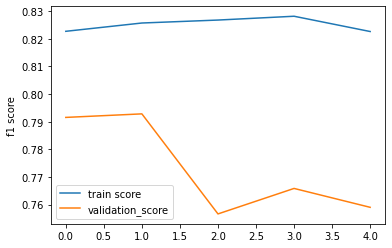

In [74]:
plt.figure()
plt.plot(cv_results['train_score'], label = 'train score')
plt.plot(cv_results['test_score'], label = 'validation_score')
plt.ylabel("f1 score")
plt.legend();

On peut voir que les résultats des différents sets de validation sont fluctuants. Ainsi les données jouent un rôle important dans le modèle.

In [75]:
#confusion matrix and f1 score on train set
svm_benzoPl.fit(X_train, np.ravel(y_train))
y_pred = svm_benzoPl.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

F1 score : 0.82
Recall score 0.87

Confusion matrix: 
 [[409 219]
 [113 767]]


Voici les perfomances de notre modèle basique, sur le test set

In [76]:
#confusion matrix and f1 score on test set
y_pred = svm_benzoPl.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

F1 score : 0.76
Recall score 0.79

Confusion matrix: 
 [[107  61]
 [ 43 166]]


In [77]:
#gridsearch 
#plusieurs plages de paramètres ont été testées, notamment pour le paramètre 'C', dont la première plage de test était 
#[1,10,100,1000]
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param = {'C': [8,9,10,11,12], 
         'gamma': ['scale', 'auto'], 
         'kernel': ['rbf', 'poly'], 
         'class_weight': ['balanced', None],
         'coef0' : [0,1]}

svm_grid_benzoPl = GridSearchCV(svm_benzoPl, param_grid=param, scoring='f1', cv=skf, n_jobs=-1)

svm_grid_benzoPl.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [8, 9, 10, 11, 12],
                         'class_weight': ['balanced', None], 'coef0': [0, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='f1')

In [78]:
svm_grid_benzoPl.best_params_

{'C': 10, 'class_weight': None, 'coef0': 0, 'gamma': 'auto', 'kernel': 'poly'}

In [79]:
svm_benzoPl_model = svm_grid_benzoPl.best_estimator_

In [80]:
cv_results = cross_validate(svm_benzoPl_model, 
                            X_train, 
                            np.ravel(y_train), 
                            cv= skf, 
                            scoring="f1",
                            return_train_score=True, 
                            n_jobs=-1)

In [81]:
print("Test score : {0:.2f} \nTrain score : {1:.2f}".format(cv_results['test_score'].mean(),
                                                            cv_results['train_score'].mean()))

Test score : 0.77 
Train score : 0.83


In [82]:
#confusion matrix and f1 score on train set
y_pred = svm_benzoPl_model.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

F1 score : 0.82
Recall score 0.91

Confusion matrix: 
 [[356 272]
 [ 79 801]]


Et voici les performances de notre final

In [83]:
#confusion matrix and f1 score on test set
y_pred = svm_benzoPl_model.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

F1 score : 0.75
Recall score 0.86

Confusion matrix: 
 [[ 76  92]
 [ 30 179]]


On voit qu'on a pu gagner en recall, mais qu'on a perdu en précision (augmentation du nombre de faux positifs)

**Benzo features importance**

Ces 2 graphiques nous permettent de visualiser les variables les plus importantes pour notre modèle, à la fois dans le train set et le test set. On voit que les variables importantes sont plus ou moins les mêmes. Ces graphiques m'ont notamment été utiles pour essayer de séléctionner des features, mais je n'ai pas gardé trace de ces expériences, qui n'ont malheuresement pas été concluantes

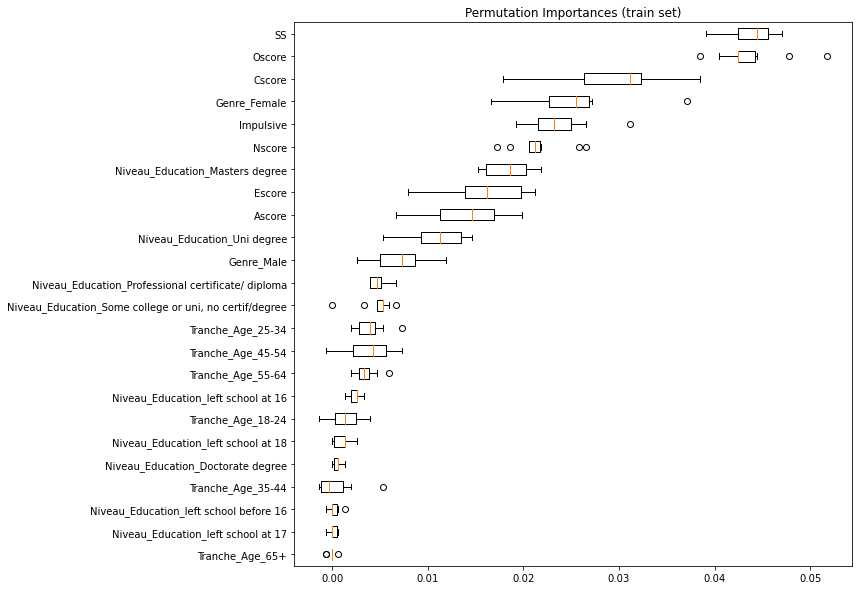

In [84]:
#features importances train set for the svm_benzoPl_model
from sklearn.inspection import permutation_importance

result = permutation_importance(
    svm_benzoPl_model, X_train, y_train, n_repeats=10, random_state=0, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,10))
plt.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
plt.title("Permutation Importances (train set)");

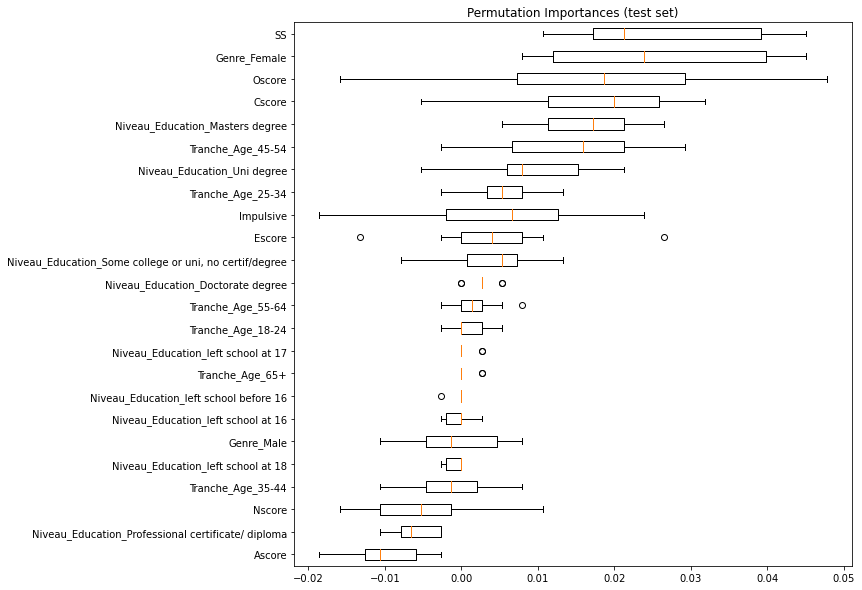

In [85]:
#features importances test set for the svm_benzoPl_model
from sklearn.inspection import permutation_importance

result = permutation_importance(
    svm_benzoPl_model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,10))
plt.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
plt.title("Permutation Importances (test set)");

F1 score : 0.75
Recall score 0.90

Confusion matrix: 
 [[ 66 102]
 [ 21 188]]


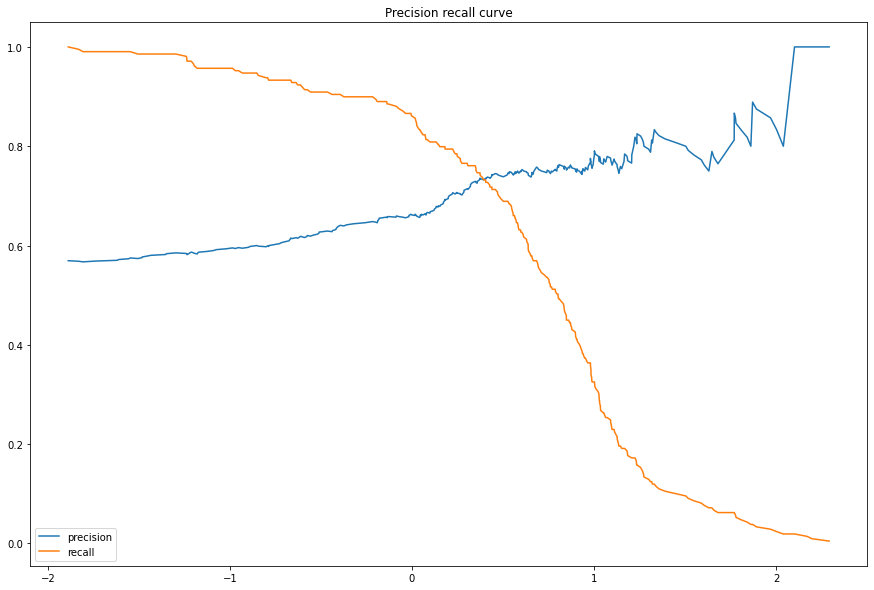

In [86]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, svm_benzoPl_model.decision_function(X_test))
plt.figure(figsize=(15,10))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()
plt.title("Precision recall curve");

y_pred = model_final(svm_benzoPl_model, X_test, threshold=-0.25)
print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

La courbe de précision et de recall m'a permis de trouver un seuil propice à l'augmentation du recall, sans trop déteriorer la précision. J'ai fait ça en tatonnant, et à l'aide du graphe.

En conclusion on arrive à obtenir un bien meilleur score pour le recall. Néanmoins, on voit qu'on a tout de même une déterioration notable de la précision, visible à travers l'augmentation du nombre de faux positif...

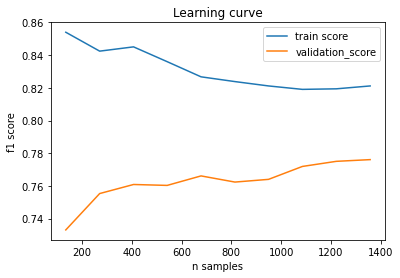

In [87]:
from sklearn.model_selection import learning_curve

N, train_score, validation_score = learning_curve(svm_benzoPl_model, X_train, np.ravel(y_train), cv=10, 
                                                      scoring = 'f1', 
                                                      train_sizes=np.linspace(0.1, 1, 10))
plt.figure()
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, validation_score.mean(axis = 1), label = 'validation_score')
plt.ylabel("f1 score")
plt.xlabel("n samples")
plt.title("Learning curve")
plt.legend();

In [88]:
import joblib

#svm_benzoPl_model.fit(X_benzoPl, y_benzoPl)
#joblib.dump(svm_benzoPl_model, 'SVC_benzo_model.pkl')

## **EcstasyPl**

J'ai moins commenté cette partie, puisqu'elle est dans le même esprit que la précédente...

In [89]:
X_ecstasyPl, y_ecstasyPl = datapreprocessing(drug_consumption.copy())
y_ecstasyPl  = y_ecstasyPl[ecstasyPl]

y_ecstasyPl["EcstasyPl"] = y_ecstasyPl.sum(axis=1).map(lambda x: 1 if x > 0 else 0)
y_ecstasyPl.drop(ecstasyPl, inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_ecstasyPl, y_ecstasyPl, test_size=0.2, random_state=0)

In [90]:
#Scaling 
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:7])
X_train.iloc[:,:7] = scaler.transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = scaler.transform(X_test.iloc[:,:7])


In [91]:
#modeling 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score
skf = StratifiedKFold(n_splits= 5)

svm_ecstasyPl = SVC(random_state=0)

cv_results = cross_validate(svm_ecstasyPl, X_train, np.ravel(y_train), cv= skf, scoring="f1",return_train_score=True, n_jobs=-1)
#svm.fit(X_train, np.ravel(y_train))

In [92]:
print("Test score : {0:.2f} \nTrain score : {1:.2f}".format(cv_results['test_score'].mean(),
                                                            cv_results['train_score'].mean()))

Test score : 0.87 
Train score : 0.91


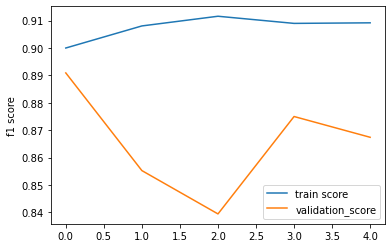

In [93]:
plt.figure()
plt.plot(cv_results['train_score'], label = 'train score')
plt.plot(cv_results['test_score'], label = 'validation_score')
plt.ylabel("f1 score")
plt.legend();

In [94]:
#confusion matrix and f1 score on train set
svm_ecstasyPl.fit(X_train, np.ravel(y_train))
y_pred = svm_ecstasyPl.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

F1 score : 0.91
Recall score 0.94

Confusion matrix: 
 [[320 127]
 [ 67 994]]


In [95]:
#confusion matrix and f1 score on test set
y_pred = svm_ecstasyPl.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

F1 score : 0.88
Recall score 0.89

Confusion matrix: 
 [[ 86  35]
 [ 28 228]]


In [96]:
#gridsearch 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param = {'C': [1,2,3,4,5], 
         'gamma': ['scale', 'auto'], 
         'kernel': ['rbf', 'poly'], 
         'class_weight': ['balanced', None],
         'coef0' : [0,1]}

svm_grid_ecstasyPl = GridSearchCV(svm_ecstasyPl, param_grid=param, scoring='f1', cv=skf, n_jobs=-1)

svm_grid_ecstasyPl.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(random_state=0), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5],
                         'class_weight': ['balanced', None], 'coef0': [0, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='f1')

In [97]:
svm_grid_ecstasyPl.best_params_

{'C': 2, 'class_weight': None, 'coef0': 0, 'gamma': 'auto', 'kernel': 'rbf'}

In [98]:
svm_ecstasyPl_model = svm_grid_ecstasyPl.best_estimator_

In [99]:
cv_results = cross_validate(svm_ecstasyPl_model, 
                            X_train, np.ravel(y_train), 
                            cv= skf, scoring="f1",
                            return_train_score=True, 
                            n_jobs=-1)


In [100]:
print("Test score : {0:.2f} \nTrain score : {1:.2f}".format(cv_results['test_score'].mean(),
                                                            cv_results['train_score'].mean()))

Test score : 0.87 
Train score : 0.90


In [101]:
#confusion matric and f1 score on train set
y_pred = svm_ecstasyPl_model.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

F1 score : 0.89
Recall score 0.92

Confusion matrix: 
 [[301 146]
 [ 88 973]]


In [102]:
#confusion matrix and f1 score on test set
y_pred = svm_ecstasyPl_model.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

F1 score : 0.87
Recall score 0.88

Confusion matrix: 
 [[ 84  37]
 [ 30 226]]


**Ecstasy features importance**

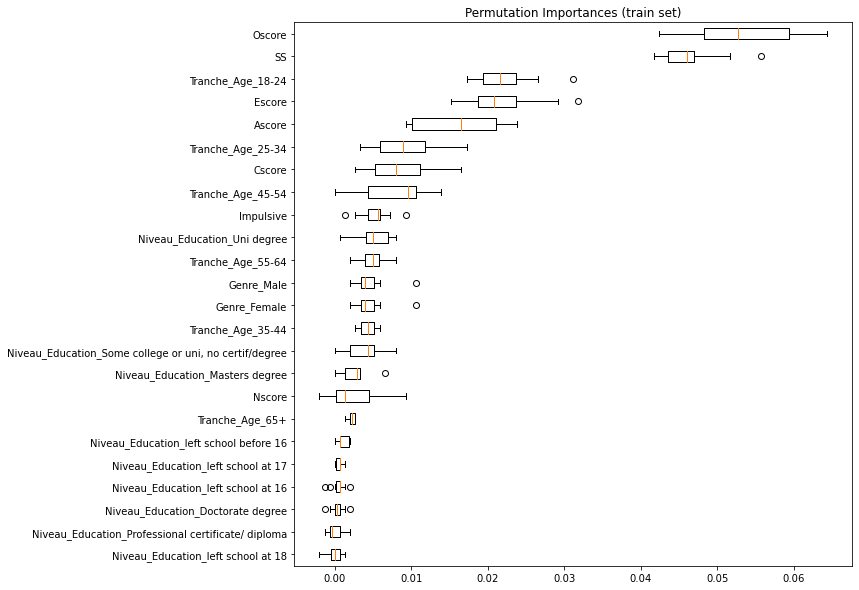

In [103]:
#features importances train set for the svm_ecstasyPl
from sklearn.inspection import permutation_importance

result = permutation_importance(
    svm_ecstasyPl_model, X_train, y_train, n_repeats=10, random_state=0, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,10))
plt.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
plt.title("Permutation Importances (train set)");

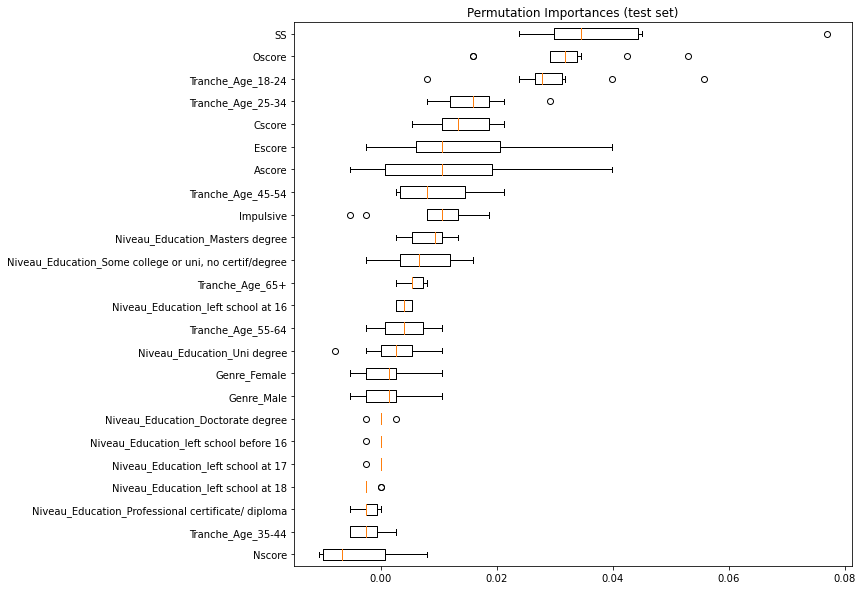

In [104]:
#features importances test set for the svm_ecstasyPl
from sklearn.inspection import permutation_importance

result = permutation_importance(
    svm_ecstasyPl_model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,10))
plt.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
plt.title("Permutation Importances (test set)");


F1 score : 0.88
Recall score 0.91

Confusion matrix: 
 [[ 78  43]
 [ 23 233]]


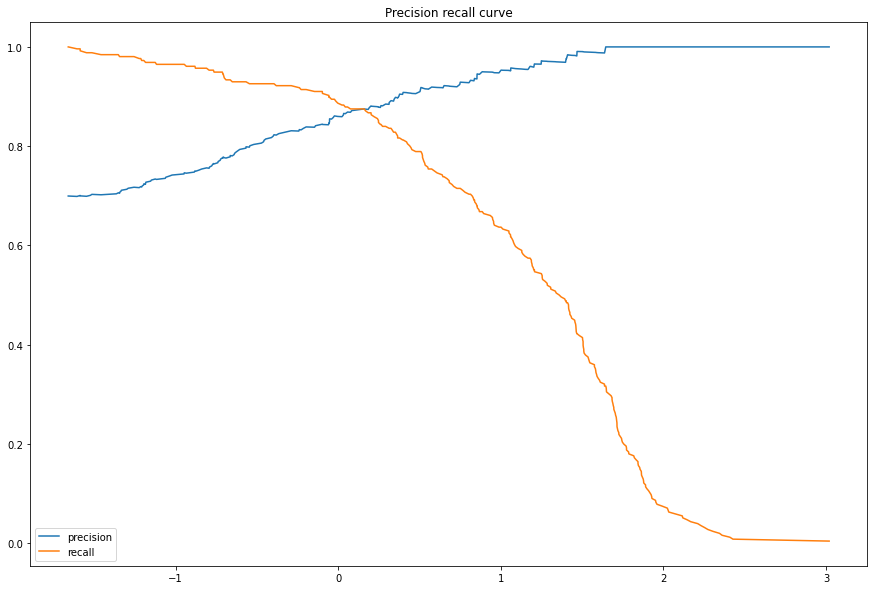

In [105]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_test, svm_ecstasyPl_model.decision_function(X_test))
plt.figure(figsize=(15,10))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.title("Precision recall curve")
plt.legend()

y_pred = model_final(svm_ecstasyPl_model, X_test, threshold=-0.1)
print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

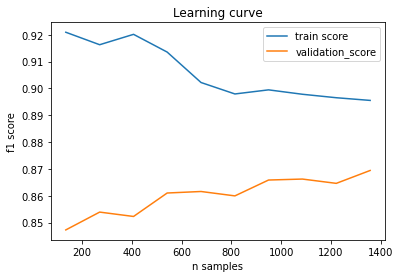

In [106]:
#learning curve
from sklearn.model_selection import learning_curve

N, train_score, validation_score = learning_curve(svm_ecstasyPl_model, X_train, np.ravel(y_train), cv=10, 
                                                      scoring = 'f1', 
                                                      train_sizes=np.linspace(0.1, 1, 10))
plt.figure()
plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, validation_score.mean(axis = 1), label = 'validation_score')
plt.ylabel("f1 score")
plt.xlabel("n samples")
plt.title("Learning curve")
plt.legend();

In [107]:
#svm_ecstasyPl_model.fit(X_ecstasyPl, y_ecstasyPl)
#joblib.dump(svm_ecstasyPl_model, 'SVC_ecstasy_model.pkl')

## **HeroinPl**

In [108]:
X_heroinPl, y_heroinPl = datapreprocessing(drug_consumption.copy())
y_heroinPl  = y_heroinPl[heroinPl]

y_heroinPl["HeroinPl"] = y_heroinPl.sum(axis=1).map(lambda x: 1 if x > 0 else 0)
y_heroinPl.drop(heroinPl, inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_heroinPl, y_heroinPl, test_size=0.2, random_state=0)

In [109]:
#modeling 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score

skf = StratifiedKFold(n_splits= 5)

rf_heroinPl = RandomForestClassifier(random_state=0)

cv_results = cross_validate(rf_heroinPl, X_train, np.ravel(y_train), cv= skf, scoring="f1",return_train_score=True, n_jobs=-1)
#svm.fit(X_train, np.ravel(y_train))

In [110]:
print("Test score : {0:.2f} \nTrain score : {1:.2f}".format(cv_results['test_score'].mean(),
                                                            cv_results['train_score'].mean()))

Test score : 0.62 
Train score : 1.00


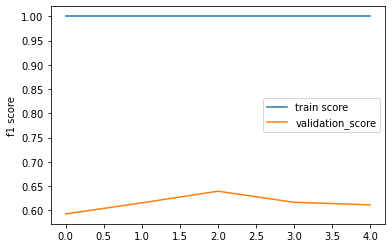

In [111]:
plt.figure()
plt.plot(cv_results['train_score'], label = 'train score')
plt.plot(cv_results['test_score'], label = 'validation_score')
plt.ylabel("f1 score")
plt.legend();

On voit ici que le score pour les différents train set est constamment de 1, ce qui est à la fois extremement surprenant mais aussi compréhensible. En effet on peut supposer que, comme le modèle de RandomForest de base n'a pas de profondeur limite, il a réussi à se coller parfaitement aux données. Néanmoins il est incapable de généraliser son apprentissage. Ce modèle est victime d'overfitting.

In [112]:
#confusion matrix and f1 score on train set
rf_heroinPl.fit(X_train, np.ravel(y_train))
y_pred = rf_heroinPl.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

F1 score : 1.00
Recall score 1.00

Confusion matrix: 
 [[824   0]
 [  0 684]]


In [113]:
#confusion matrix and f1 score on test set
y_pred = rf_heroinPl.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

F1 score : 0.70
Recall score 0.73

Confusion matrix: 
 [[176  53]
 [ 40 108]]


Le score final est tout de même très décevant au vu du score sur le training, mais en réduisant la profondeur des branches, nous allons pallier au problème d'overfitting

In [114]:
#gridsearch 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param = {'n_estimators': [100,200,300,400,500],
         'max_depth' : np.arange(1,11),
         'max_features' : ["auto", "log2"],
         'class_weight':['balanced', 'balanced_subsample', None]}

rf_grid_heroinPl = GridSearchCV(rf_heroinPl, param_grid=param, scoring='f1', cv=skf, n_jobs=-1)

rf_grid_heroinPl.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='f1')

In [115]:
rf_grid_heroinPl.best_params_

{'class_weight': 'balanced_subsample',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 400}

In [116]:
rf_heroinPl_model = rf_grid_heroinPl.best_estimator_

In [117]:
cv_results = cross_validate(rf_heroinPl_model, 
                            X_train, np.ravel(y_train), 
                            cv= skf, scoring="f1",
                            return_train_score=True, 
                            n_jobs=-1)

In [118]:
print("Test score : {0:.2f} \nTrain score : {1:.2f}".format(cv_results['test_score'].mean(),
                                                            cv_results['train_score'].mean()))

Test score : 0.68 
Train score : 0.72


Désormais, il n'y a plus vraiment d'overfitting

In [119]:
#confusion matric and f1 score on train set
y_pred = rf_heroinPl_model.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

F1 score : 0.72
Recall score 0.77

Confusion matrix: 
 [[562 262]
 [154 530]]


In [120]:
#confusion matrix and f1 score on test set
y_pred = rf_heroinPl_model.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

F1 score : 0.69
Recall score 0.76

Confusion matrix: 
 [[162  67]
 [ 36 112]]


Au final on arrive tout de même à gagner en recall

**HeroinPl features importance**

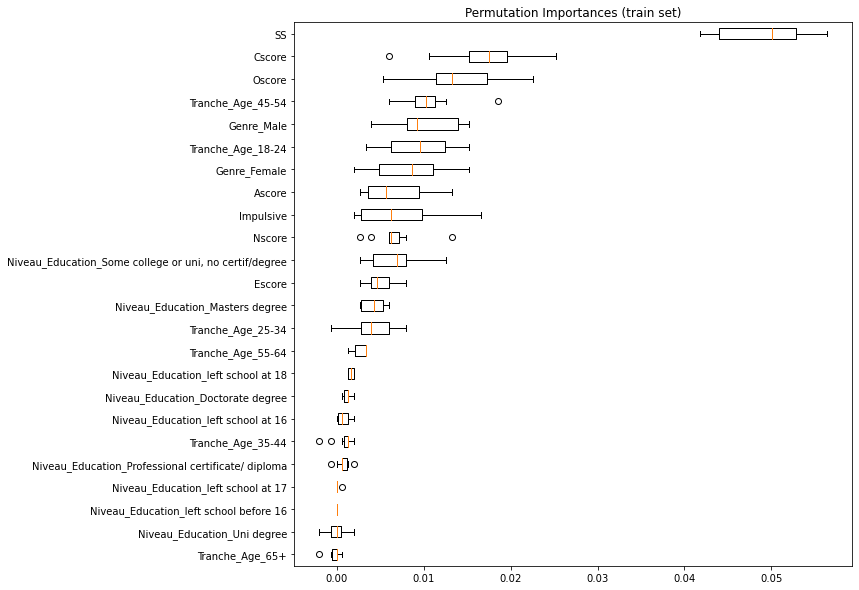

In [121]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_heroinPl_model, X_train, y_train, n_repeats=10, random_state=0, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,10))
plt.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
plt.title("Permutation Importances (train set)");


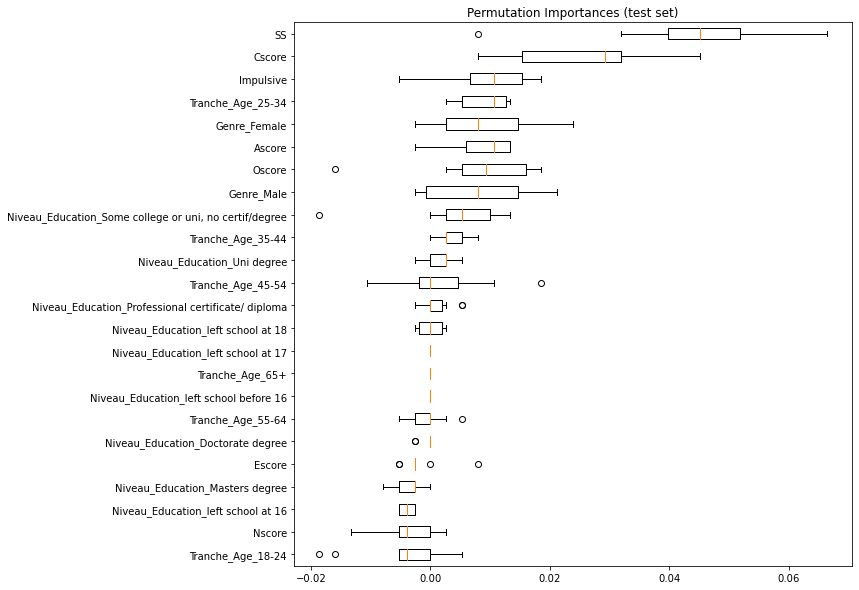

In [122]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rf_heroinPl_model, X_test, y_test, n_repeats=10, random_state=0, n_jobs=-1
)
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10,10))
plt.boxplot(
    result.importances[sorted_idx].T, vert=False, labels=X_test.columns[sorted_idx]
)
plt.title("Permutation Importances (test set)");


En regardant les variables les plus importantes pour le train et test set, on voit qu'elles ne sont pas similaires. Je pense que cela impacte notre modèle négativement, mais je n'ai pas réussi à réellement tirer de la valeur ajoutée à cette réflexion.

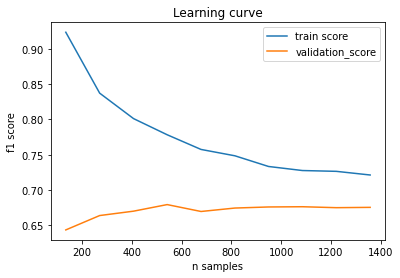

In [123]:
#learning curve
from sklearn.model_selection import learning_curve

N, train_score, validation_score = learning_curve(rf_heroinPl_model, X_train, np.ravel(y_train), cv=10, 
                                                      scoring = 'f1', 
                                                      train_sizes=np.linspace(0.1, 1, 10))

plt.plot(N, train_score.mean(axis = 1), label = 'train score')
plt.plot(N, validation_score.mean(axis = 1), label = 'validation_score')
plt.ylabel("f1 score")
plt.xlabel("n samples")
plt.title("Learning curve")
plt.legend();

On peut voir que ce modèle n'a plus vraiment besoin de donnée à partir de 800 lignes, ce qui est surprenant. Cela veut dire qu'apporter plus de données à notre modèle ne serait pas utile.

In [124]:
#joblib.dump(rf_heroinPl_model, 'RF_heroin_model.pkl')

On essaie un autre modèle

En utilisant ma fonction BestModelForEachDrug j'ai pu regarder le classement des différents modèles et derrière la randomforest se trouve la svc. J'ai donc décidé de tester ce modèle, je vous mets directement l'optimisation du modèle et ces résultats (sans utilisation du seuil de la fonction de décision) 

In [125]:
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:7])
X_train.iloc[:,:7] = scaler.transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = scaler.transform(X_test.iloc[:,:7])

In [ ]:
#gridsearch 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param = {'C': [1,2,3,4,5], 
         'gamma': ['scale', 'auto'], 
         'kernel': ['rbf', 'poly'], 
         'class_weight': ['balanced', None],
         'coef0' : [0,1]}

svm_grid_heroinPl = GridSearchCV(SVC(random_state=0), param_grid=param, scoring='f1', cv=skf, n_jobs=-1)

svm_grid_heroinPl.fit(X_train, np.ravel(y_train))

In [ ]:
svm_heroinPl_model = svm_grid_heroinPl.best_estimator_

In [ ]:
#confusion matric and f1 score on train set
y_pred = svm_heroinPl_model.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

In [ ]:
#confusion matrix and f1 score on test set
y_pred = svm_heroinPl_model.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

On réussi à gagner en recall de façon significative. En conclusion, ce modèle pourrait être une très bonne alternative ! 

# Features engineering 

On va essayer à partir des 5 score NEOAC de créer un score représentatif de ces 5 scores, en utilisant un modèle qui nous permet d'avoir accès au coefficient qu'il donne à chaque variables. Par exemple la regression logistique.

In [ ]:
neoac = ["Nscore", "Escore", "Oscore", "Ascore", "Cscore"]
X_benzoPl, y_benzoPl = datapreprocessing(drug_consumption.copy())
y_benzoPl = y_benzoPl[benzoPl]

y_benzoPl["BenzoPl"] = y_benzoPl.sum(axis=1).map(lambda x: 1 if x > 0 else 0)
y_benzoPl.drop(benzoPl, inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_benzoPl[neoac], y_benzoPl, test_size=0.2, random_state=0)


In [ ]:
X_train

In [ ]:
lr = LogisticRegression(random_state=0, solver='liblinear', penalty = 'l2')
lr.fit(X_train, np.ravel(y_train))


In [ ]:
#confusion matrix and f1 score on train set
y_pred = lr.predict(X_train)
print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
confusion_matrix(y_train, y_pred)

In [ ]:
#confusion matrix and f1 score on test set
y_pred = lr.predict(X_test)
print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
confusion_matrix(y_test, y_pred)

**A noter qu'on obtient tout de même un score honorable, en utilisant uniquement les résultats des scores. On peut se demander s'il aurait été pertinant de produire des modèles sur la base de ces scores uniquement.**

In [ ]:
coef_benzo = lr.coef_

In [ ]:
lr.intercept_

In [ ]:
X_benzoPl["NewScore"] = X_benzoPl["Nscore"]*coef_benzo[0][0] + X_benzoPl["Escore"]*coef_benzo[0][1]  + X_benzoPl["Oscore"]*coef_benzo[0][2]  + X_benzoPl["Ascore"]*coef_benzo[0][3]  + X_benzoPl["Cscore"]*coef_benzo[0][4] + lr.intercept_ 

In [ ]:
X_benzoPl.drop(neoac, axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_benzoPl, y_benzoPl, test_size=0.2, random_state=0)

In [ ]:
X_train

In [ ]:
#confusion matrix and f1 score on train set
svm = SVC(random_state=0)
svm.fit(X_train, np.ravel(y_train))
y_pred = svm.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

In [ ]:
#confusion matrix and f1 score on test set
y_pred = svm.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param = {'C': [11], 
         'gamma': ['scale', 'auto'], 
         'kernel': ['rbf', 'poly'], 
         'class_weight': ['balanced', None],
         'coef0' : [0,1]}

svm_grid_benzoPl = GridSearchCV(svm, param_grid=param, scoring='f1', cv=skf, n_jobs=-1)

svm_grid_benzoPl.fit(X_train, np.ravel(y_train))

In [ ]:
svm_grid_benzoPl.best_params_

In [ ]:
a = svm_grid_benzoPl.best_estimator_

In [ ]:
#confusion matrix and f1 score on train set
y_pred = a.predict(X_train)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

In [ ]:
#confusion matrix and f1 score on test set
y_pred = a.predict(X_test)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

On voit qu'au final, on ne gagne rien via la création de cette variable...Cela ne parait pas si suprenant, mais je pensais que ça aurait tout de même un léger impact.

# PCA 

Cette partie vise à vérifier si une PCA sur les variables non catégoriques permet d'améliorer les perfomances de nos modèles

In [ ]:
X_benzoPl, y_benzoPl = datapreprocessing(drug_consumption.copy())
y_benzoPl = y_benzoPl[benzoPl]

y_benzoPl["BenzoPl"] = y_benzoPl.sum(axis=1).map(lambda x: 1 if x > 0 else 0)
y_benzoPl.drop(benzoPl, inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_benzoPl, y_benzoPl, test_size=0.2, random_state=0)

In [ ]:
X_train.head()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [ ]:
pca.fit(X_train.iloc[:,:7])
X_new = pca.transform(X_train.iloc[:,:7])

In [ ]:
X_new.shape

In [ ]:
print(pca.explained_variance_ratio_)

On est passé de 7 dimensions à 6, un gain qui parait peu significatif

In [ ]:
X_new_pd = pd.DataFrame(X_new, columns=[str("pc"+str(i)) for i in range(1,7)])

In [ ]:
X_new_pd.index = X_train.index

In [ ]:
X_train_new = pd.concat([X_new_pd, X_train.iloc[:,7:]], axis=1)

In [ ]:
#modeling 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate, cross_val_score
skf = StratifiedKFold(n_splits= 5)

svm = SVC(random_state=0)

cv_results = cross_validate(svm, X_train_new, np.ravel(y_train), cv= skf, scoring="f1",return_train_score=True, n_jobs=-1)
#svm.fit(X_train, np.ravel(y_train))


In [ ]:
print("Validation score : {0:.2f} \nTrain score : {1:.2f}".format(cv_results['test_score'].mean(),
                                                            cv_results['train_score'].mean()))

In [ ]:
#confusion matrix and f1 score on train set

svm.fit(X_train_new, np.ravel(y_train))
y_pred = svm.predict(X_train_new)

print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_train, y_pred), recall_score(y_train, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_train, y_pred))

In [ ]:
X_new_test = pca.transform(X_test.iloc[:,:7])
X_new_test_pd = pd.DataFrame(X_new_test, columns=[str("pc"+str(i)) for i in range(1,7)])
X_new_test_pd.index = X_test.index
X_test_new = pd.concat([X_new_test_pd, X_test.iloc[:,7:]], axis = 1)
                       

In [ ]:
#confusion matrix and f1 score on test set
y_pred = svm.predict(X_test_new)
print("F1 score : {0:.2f}\nRecall score {1:.2f}".format(f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
print("\nConfusion matrix: \n", confusion_matrix(y_test, y_pred))

Au final, il n'y a pas vrmt d'amélioration...